## Importando as libs usadas no processo

In [14]:
import warnings
warnings.filterwarnings('ignore')

import itertools

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from pprint import pprint

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import precision_score


from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_validate
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from xgboost.sklearn import XGBClassifier

from sklearn.naive_bayes import GaussianNB

In [2]:
#@title
def plot_confusion_matrix(cm, classes=['Desistente', 'Não Desistente'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        # print('Confusion matrix, without normalization')

    #print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 10)
    plt.yticks(tick_marks, classes, size = 10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 15)
    plt.xlabel('Predicted label', size = 15)

# Confusion matrix
# cm = confusion_matrix(y_test, y_predict)
#plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
#                      title = 'Health Confusion Matrix')
# plot_confusion_matrix(cm, classes = ['Desistente', 'Não Desistente'],
#                      title = 'Confusion Matrix')
# plt.savefig('cm.png')

def confusion_matrix(df_all_predictions):
    #l = []
    for modelo in df_all_predictions.columns:
        tp = df_all_predictions[(df_all_predictions[modelo] == 'Desistente') & (df_all_predictions['target'] == 'Desistente')].shape[0]
        tn = df_all_predictions[(df_all_predictions[modelo] == 'Não Desistente') & (df_all_predictions['target'] =='Não Desistente')].shape[0]
        fp = df_all_predictions[(df_all_predictions[modelo] == 'Desistente') & (df_all_predictions['target'] == 'Não Desistente')].shape[0]
        fn = df_all_predictions[(df_all_predictions[modelo] == 'Não Desistente') & (df_all_predictions['target'] == 'Desistente')].shape[0]
        m = [[tp, fn], [fp, tn]]
        #l.append(m)
        print('Modelo =', modelos)
        cm = metrics.confusion_matrix(df_all_predictions['target'].values, df_all_predictions[modelo].values)
        plot_confusion_matrix(cm)

## Impontando os arquivos para gerar os DataFrames usados

In [3]:
#@title
df_target_user = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/csv_datasets/usuarios_classificados.csv')
df_target_user = df_target_user[['semester_id', 'class_id', 'user_id', 'target']]

file_path = '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataset_train/turmas_impares/dataset_prova_2.xlsx'
df_dataset = pd.read_excel(file_path, sheet_name=0)
#df_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
df_dataset.fillna(0, inplace=True)
df_dataset.class_id.unique().shape

df_data_target = pd.merge(df_dataset, df_target_user, on=['semester_id', 'class_id', 'user_id'], how='inner')
#df_data_target.drop(['semester_id', 'class_id', 'user_id'], axis=1, inplace=True)    
df_data_target

semester_id  class_id  ...  sum_homework_code_line          target
0         2019-1       225  ...                     132  Não Desistente
1         2019-1       225  ...                     105  Não Desistente
2         2019-1       225  ...                      44      Desistente
3         2019-1       225  ...                      82      Desistente
4         2019-1       225  ...                       3      Desistente
...          ...       ...  ...                     ...             ...
2005      2017-1       135  ...                      41      Desistente
2006      2017-1       135  ...                     156  Não Desistente
2007      2017-1       135  ...                     100      Desistente
2008      2017-1       135  ...                      49      Desistente
2009      2017-1       135  ...                       6      Desistente

[2010 rows x 38 columns]

In [9]:
#@title
df_user_activate = df_data_target.copy()

def activity(row):
    if np.sum(row) > 0:
        return 'Ativo'
    else:
        return 'Inativo'

df_user_activate['status'] = df_user_activate.iloc[:, 3:-1].apply(lambda row: activity(row), axis='columns')
df_user_activate

semester_id  class_id  ...          target  status
0         2019-1       225  ...  Não Desistente   Ativo
1         2019-1       225  ...  Não Desistente   Ativo
2         2019-1       225  ...      Desistente   Ativo
3         2019-1       225  ...      Desistente   Ativo
4         2019-1       225  ...      Desistente   Ativo
...          ...       ...  ...             ...     ...
2005      2017-1       135  ...      Desistente   Ativo
2006      2017-1       135  ...  Não Desistente   Ativo
2007      2017-1       135  ...      Desistente   Ativo
2008      2017-1       135  ...      Desistente   Ativo
2009      2017-1       135  ...      Desistente   Ativo

[2010 rows x 39 columns]

## Separando os dados treino até 3º prova

### Random Forest

[Tuning o modelo](https://https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [4]:
#@title

def train_test_random_forest(X, Y):
    acur_rf = []
    precision = []
    recall = []
    f1_macro = []
    f1_micro = []
    dict_predict_rf = {}

    # model
    classifier_rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5, n_estimators=25, verbose=0)

    # cv = KFold(n_splits=10,  random_state=2**32 - 1, shuffle=True)
    cv = KFold(n_splits=10, shuffle=True)

    for train_index, test_index in cv.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

        # fit model
        classifier_rf.fit(X_train, y_train)

        # testing model
        y_predict_rf  = classifier_rf.predict(X_test)

        # dataframe predictions
        d = dict(zip(test_index, y_predict_rf))
        dict_predict_rf.update(d)

        # acum accurary
        acur_rf.append(accuracy_score(y_test, y_predict_rf))
        #precision.append(precision_score(y_test, y_predict_rf, pos_label=['Desistente', 'Não Desistente'], zero_division=0))
        #recall.append(recall_score(y_test, y_predict_rf))
        f1_macro.append(f1_score(y_test, y_predict_rf, average='macro'))
        f1_micro.append(f1_score(y_test, y_predict_rf, average='micro'))
        
    #print('Acurácia Média Random Forest:', np.mean(acur_rf))
    #print('F1 macro média Random Forest:', np.mean(f1_macro))
    #print('F1 micro média Random Forest:', np.mean(f1_micro))
    #print('Precisão Média Random Forest:', np.mean(precision))
    #print('Recall Média Radom Forest:', np.mean(recall))

    d = dict(sorted(dict_predict_rf.items()))
    a = np.array([w for v,w in d.items()])
    return a, np.mean(acur_rf), classifier_rf

### Extra Tree Classifier

In [5]:
#@title

def train_test_extra_tree_classifier(X, Y):
    acur_etc = []
    dict_predict_etc = {}

    # model
    classifier_etc = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_depth=3, n_estimators=25)

    # cv = KFold(n_splits=10,  random_state=2**32 - 1, shuffle=True)
    cv = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in cv.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

        # fit model
        classifier_etc.fit(X_train, y_train)

        # testing model
        y_predict_etc = classifier_etc.predict(X_test)

        # dataframe predictions
        d = dict(zip(test_index, y_predict_etc))
        dict_predict_etc.update(d)

        # acum accurary
        acur_etc.append(accuracy_score(y_test, y_predict_etc))    
        
    #print('Acurácia Média Extra Tree Classifier:', np.mean(acur_etc))

    d = dict(sorted(dict_predict_etc.items()))
    a = np.array([w for v,w in d.items()])
    return a, np.mean(acur_etc), classifier_etc


### XGBoost com early_stopping_rounds

In [6]:
#@title

def train_test_xgb_early_stopping(X, Y):
    acur_xgb_we = []
    dict_predict_xgb_we = {}

    # model
    classifier_xgb_we = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60, verbosity=0)

    # cv = KFold(n_splits=10,  random_state=2**32 - 1, shuffle=True)
    cv = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in cv.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

        # criando um particao de validação para o modelo xgb
        X_val, y_val = X_train[0:2], y_train[0:2]

        # fit model
        classifier_xgb_we.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=False)

        # testing model

        y_predict_xgb_we = classifier_xgb_we.predict(X_test)

        # dataframe predictions
        d = dict(zip(test_index, y_predict_xgb_we))
        dict_predict_xgb_we.update(d)

        # acum accurary
        acur_xgb_we.append(accuracy_score(y_test, y_predict_xgb_we))
        
    #print('Acurácia Média XGBoost com early_stopping_rounds', np.mean(acur_xgb_we))

    d = dict(sorted(dict_predict_xgb_we.items()))
    a = np.array([w for v,w in d.items()])
    return a, np.mean(acur_xgb_we), classifier_xgb_we


### XGBoost sem early_stopping_rounds

In [7]:
#@title 
def train_test_xgb(X, Y):
    acur_xgb_ne = []
    dict_predict_xgb_ne = {}

    # model
    classifier_xgb_ne = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60, verbosity=0)

    # cv = KFold(n_splits=10,  random_state=2**32 - 1, shuffle=True)
    cv = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in cv.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

        # fit model
        classifier_xgb_ne.fit(X_train, y_train, verbose=False)

        # testing model

        y_predict_xgb_ne = classifier_xgb_ne.predict(X_test)

        # dataframe predictions
        d = dict(zip(test_index, y_predict_xgb_ne))
        dict_predict_xgb_ne.update(d)

        # acum accurary
        acur_xgb_ne.append(accuracy_score(y_test, y_predict_xgb_ne))
        
    #print('Acurácia Média XGBoost sem early_stopping_rounds', np.mean(acur_xgb_ne))

    d = dict(sorted(dict_predict_xgb_ne.items()))
    a = np.array([w for v,w in d.items()])
    return a, np.mean(acur_xgb_ne), classifier_xgb_ne
    # df_all_predictions['xgb'] = a


### Gaussian Naive Bayes

In [8]:
#@title

def train_test_gaussian_naive_bayes(X, Y):
    acur_gnb = []
    dict_predict_gnb = {}

    # model
    classifier_gnb = GaussianNB()

    # cv = KFold(n_splits=10,  random_state=2**32 - 1, shuffle=True)
    cv = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in cv.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

        # fit model
        classifier_gnb.fit(X_train, y_train)

        # testing model
        y_predict_gnb = classifier_gnb.predict(X_test)

        # dataframe predictions
        d = dict(zip(test_index, y_predict_gnb))
        dict_predict_gnb.update(d)

        # acum accurary
        acur_gnb.append(accuracy_score(y_test, y_predict_gnb))

    #print('Acurácia Média Gaussian Naive Bayes', np.mean(acur_gnb))

    d = dict(sorted(dict_predict_gnb.items()))
    a = np.array([w for v,w in d.items()])
    return a, np.mean(acur_gnb), classifier_gnb
    # df_all_predictions['gaussian_naive_bayes'] = a


In [10]:
def general_results(y_test, y_pred, class_id):
    #l = ['class_id', 'true_negative', 'false_positive', 'false_negative', 'true_positive', 'ASD_predicto', 'ASND_predicto', 'ASD_real', 'ASND_real']
    #print(l)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    #print(f'{class_id},\t\t{tn},\t\t{fp},\t\t{fn},\t\t{tp}')

    # creating a df of satatus by class
    status = df_user_activate[df_user_activate['class_id'] == class_id].copy()
    status = status['status'].copy().values

    # count students no active and active
    count_asd_pred = 0
    count_asnd_pred = 0
    count_asd_real = 0
    count_asnd_real = 0
    for i in range(len(y_test)):
        if y_pred[i] == 'Desistente' and status[i] == 'Inativo':
            count_asd_pred += 1
        if y_pred[i] == 'Não Desistente' and status[i] == 'Inativo':
            count_asnd_pred += 1
        if y_test[i] == 'Desistente' and status[i] == 'Inativo':
            count_asd_real += 1
        if y_test[i] == 'Não Desistente' and status[i] == 'Inativo':
            count_asnd_real += 1
    #print(len(y_test), len(y_pred), len(status))
    #print(y_pred)

    #print(f'{class_id},\t\t{tn},\t\t{fp},\t\t{fn},\t\t{tp},\t\t{count_asd_pred},\t\t{count_asnd_pred},\t\t{count_asd_real},\t\t{count_asnd_real}')
    return class_id, tn, fp, fn, tp, count_asd_pred, count_asnd_pred, count_asd_real, count_asnd_real

## Treinando e testando as turmas individualmente (predições e acurácia de cada turma)

In [15]:
##@title

c = ['class_id', 'true_negative', 'false_positive', 'false_negative', 'true_positive', 'ASD_predicto', 'ASND_predicto', 'ASD_real', 'ASND_real']
gen_result_rand_forest = [c]
gen_result_tree_class = [c]
gen_result_xgb_we = [c]
gen_result_xgb_ne = [c]
gen_result_gnb = [c]

def train_test_all_models(x, y, class_id):
    predictions = pd.DataFrame()
    accuracy = pd.DataFrame()
    predictions['target'] = y


    ## RANDOM FOREST
    pred, accur, c = train_test_random_forest(x, y)
    predictions['pred_rf'] = pred
    accuracy['accur_rf'] = [accur]

    #plot confusion matrix
    t = 'class_id = '+str(class_id)+', Modelo = Random Forest'
    m = confusion_matrix(y, pred)
    #plot_confusion_matrix(cm=m, title=t)

    #salve on excel file values of preditions
    gen_result_rand_forest = list(general_results(y, pred, class_id))

    ## EXTRA TREE CLASSIFIER
    pred, accur, c = train_test_extra_tree_classifier(x, y)
    predictions['pred_etc'] = pred
    accuracy['accur_etc'] = [accur]

    t = 'class_id = '+str(class_id)+', Modelo = Extra Tree Classifier'
    m = metrics.confusion_matrix(y, pred)
    plot_confusion_matrix(cm=m, title=t)

    gen_result_tree_class = list(general_results(y, pred, class_id))

    ## XGBOOST
    pred, accur, c = train_test_xgb(x, y)
    predictions['pred_xgb_we'] = pred
    accuracy['accur_xgb_we'] = [accur]

    t = 'class_id = '+str(class_id)+', Modelo = XGBoost com Early'
    m = metrics.confusion_matrix(y, pred)
    plot_confusion_matrix(cm=m, title=t)

    gen_result_xgb_we = list(general_results(y, pred, class_id))

    ## XGBOOST NO EARLY STOPPING
    pred, accur, c = train_test_xgb_early_stopping(x, y)
    predictions['pred_xgb_ne'] = pred
    accuracy['accur_xgb_ne'] = [accur]

    t = 'class_id = '+str(class_id)+', Modelo = XGBoost sem Early'
    m = metrics.confusion_matrix(y, pred)
    plot_confusion_matrix(cm=m, title=t)

    gen_result_xgb_ne = list(general_results(y, pred, class_id))

    ## GAUSSIAN NAIVE BAYES
    pred, accur, c = train_test_gaussian_naive_bayes(x, y)
    predictions['pred_gnb'] = pred
    accuracy['accur_gnb'] = [accur]

    t = 'class_id = '+str(class_id)+', Modelo = Gaussian Naive Bayes'
    m = metrics.confusion_matrix(y, pred)
    plot_confusion_matrix(cm=m, title=t)

    gen_result_gnb = list(general_results(y, pred, class_id))

    return predictions, accuracy, gen_result_rand_forest, gen_result_tree_class, gen_result_xgb_we, gen_result_xgb_ne, gen_result_gnb

def train_individual_classes():
    count = 1
    list_class_inf_train = []

    for class_id in df_data_target.class_id.unique():
        #print(class_id)
        dict_class_inf_train = {}
        # print(df_data_target.loc[df_data_target['class_id'] == class_id])
        df_data_class = df_data_target.loc[df_data_target['class_id'] == class_id]
        df_data_class = df_data_class.iloc[:, 3:]
        # print(df_data_class)
        features = df_data_class.columns.difference(['target'])
        x = df_data_class[features].values
        y = df_data_class['target'].values
        #print('class_id, true_negative, false_positive, false_negative, true_positive')
        pred, accur, rf, etc, xgb_we, xgb_ne, gnb = train_test_all_models(x, y, class_id)

        ## Increament results
        gen_result_rand_forest.append(rf)
        gen_result_tree_class.append(etc)
        gen_result_xgb_we.append(xgb_we)
        gen_result_xgb_ne.append(xgb_ne)
        gen_result_gnb.append(gnb)

        dict_class_inf_train['class_id'] = class_id
        dict_class_inf_train['pred'] = pred
        dict_class_inf_train['accur'] = accur
        list_class_inf_train.append(dict_class_inf_train)
    return (list_class_inf_train)

list_results_train = train_individual_classes()


Output hidden; open in https://colab.research.google.com to view.

In [16]:
##@title
from pandas import ExcelWriter

path = '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataset_experimento/resultado_provas/gen_result/prova_2_treino_teste_turmas_individuais.xlsx'
writer = ExcelWriter(path)

df_gen_resul_rf = pd.DataFrame(gen_result_rand_forest[1:], columns=gen_result_rand_forest[0])
df_gen_resul_etc = pd.DataFrame(gen_result_tree_class[1:], columns=gen_result_tree_class[0])
df_gen_result_xgb_we = pd.DataFrame(gen_result_xgb_we[1:], columns=gen_result_xgb_we[0])
df_gen_result_xgb_ne = pd.DataFrame(gen_result_xgb_ne[1:], columns=gen_result_xgb_ne[0])
df_gen_result_gnb = pd.DataFrame(gen_result_gnb[1:], columns=gen_result_gnb[0])

df_gen_resul_rf.to_excel(writer, sheet_name='random_forest')
df_gen_resul_etc.to_excel(writer, sheet_name='extra_tree_clasifier')
df_gen_result_xgb_we.to_excel(writer, sheet_name='xgboost_com_early_stopping')
df_gen_result_xgb_ne.to_excel(writer, sheet_name='xgboost_sem_early_stopping')
df_gen_result_gnb.to_excel(writer, sheet_name='gaussian_naive_bayes')

writer.save()

In [ ]:
#@title
df_accur_all_classes = [['class_id', 'random_forest', 'extra_tree_class', 'xgboost', 'xgboost_early_stopping', 'gaussian_naive_bayes']]
for class_results in list_results_train:
    #print('class_id=',class_results['class_id'])
    #print(class_results['accur'].values[0])
    class_id = class_results['class_id']
    l = list(class_results['accur'].values[0])
    l.insert(0, class_id)
    df_accur_all_classes.append(l)

#print(pd.DataFrame(df_accur_all_classes[1:], columns=df_accur_all_classes[0]))
df_accur_all_classes = pd.DataFrame(df_accur_all_classes[1:], columns=df_accur_all_classes[0])


## Treinando com uma turma e testando com as outras [sem cross-validation] (Resultado acurácia por turma)

In [17]:
##@title

columns = ['train_class', 'test_class', 'true_negative', 'false_positive', 'false_negative', 'true_positive', 'ASD_predicto', 'ASND_predicto', 'ASD_real', 'ASND_real']
gen_result_rand_forest = [columns]
gen_result_tree_class = [columns]
gen_result_xgb_we = [columns]
gen_result_xgb_ne = [columns]
gen_result_gnb = [columns]

def test_class(class_id, rfc, etc, xgb_we, xgb_ne, gnb):
    reg1 = [['train_class_id', 'test_class_id', 'accur_rand_forest', 'extra_tree_class', 'xgboost_early_stopping', 'xgboost', 'gaussian_naive_bayes']]

    y_tests = []
    y_preds = [[] for x in range(5)]

    for class_id_level_2 in df_data_target.class_id.unique():
        reg2 = [class_id, class_id_level_2]
        if class_id != class_id_level_2:
            #print('      Teste class:', class_id_level_2)
            df_data_class_2 = df_data_target.loc[df_data_target['class_id'] == class_id_level_2]
            df_data_class_2 = df_data_class_2.iloc[:, 3:]
            features = df_data_class_2.columns.difference(['target'])
            x_test = df_data_class_2[features].values
            y_test = df_data_class_2['target'].values

            y_tests.extend(y_test)
            #print(y_tests)

            '''RANDOM FOREST'''
            y_pred = rfc.predict(x_test)
            y_preds[0].extend(y_pred)
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
            
            gen_r_rf = list(general_results(y_test, y_pred, class_id_level_2))
            r = [class_id] + gen_r_rf
            gen_result_rand_forest.append(r)
            
            '''EXTRA TREE CLASSIFIER'''
            y_pred = etc.predict(x_test)
            y_preds[1].extend(y_pred)
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))

            gen_r_etc = list(general_results(y_test, y_pred, class_id_level_2))
            r = [class_id] + gen_r_etc
            gen_result_tree_class.append(r)

            '''XGBOOST COM EARLY STOPPING'''
            y_pred = xgb_we.predict(x_test)
            y_preds[2].extend(y_pred)
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))

            gen_r_xgb_we = list(general_results(y_test, y_pred, class_id_level_2))
            r = [class_id] + gen_r_xgb_we
            gen_result_xgb_we.append(r)

            '''XGBOOST SEM EARLY STOPPING'''
            y_pred = xgb_ne.predict(x_test)
            y_preds[3].extend(y_pred)
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))

            gen_r_xgb_ne = list(general_results(y_test, y_pred, class_id_level_2))
            r = [class_id] + gen_r_xgb_ne
            gen_result_xgb_ne.append(r)

            '''GAUSSIAN NAIVE BAYES'''
            y_pred = gnb.predict(x_test)
            y_preds[4].extend(y_pred)
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))

            gen_r_gnb = list(general_results(y_test, y_pred, class_id_level_2))
            r = [class_id] + gen_r_gnb
            gen_result_gnb.append(r)

            reg1.append(reg2)

    #print(len(y_tests), len(y_preds[0]))
    m = metrics.confusion_matrix(y_tests, y_preds[0])
    t = 'train_class = ' + str(class_id) + ' Random Forest'
    plot_confusion_matrix(cm=m, title=t)


    m = metrics.confusion_matrix(y_tests, y_preds[1])
    t = 'train_class = ' + str(class_id) + ' Extra Tree Classifier'
    plot_confusion_matrix(cm=m, title=t)

    m = metrics.confusion_matrix(y_tests, y_preds[2])
    t = 'train_class = ' + str(class_id) + ' XGBoost com early stopping'
    plot_confusion_matrix(cm=m, title=t)

    m = metrics.confusion_matrix(y_tests, y_preds[3])
    t = 'train_class = ' + str(class_id) + ' XGBoost sem early stopping'
    plot_confusion_matrix(cm=m, title=t)

    m = metrics.confusion_matrix(y_tests, y_preds[4])
    t = 'train_class = ' + str(class_id) + ' Gaussian Naive Bayes'
    plot_confusion_matrix(cm=m, title=t)
    
    #print(pd.DataFrame(reg1[1:], columns=reg1[0]))
    return pd.DataFrame(reg1[1:], columns=reg1[0])


def train_class(df_data_class, features):
    x_train = df_data_class[features].values
    y_train = df_data_class['target'].values

    # model to learning
    rfc = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5, n_estimators=25, verbose=0)
    etc = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_depth=3, n_estimators=25)
    xgb_we = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60, verbosity=0)
    xgb_ne = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60, verbosity=0)
    gnb = GaussianNB()

    rfc.fit(x_train, y_train)
    etc.fit(x_train, y_train)
    xgb_we.fit(x_train, y_train)
    xgb_ne.fit(x_train, y_train)
    gnb.fit(x_train, y_train)

    return rfc, etc, xgb_we, xgb_ne, gnb

def train_class_test_one_a_one():
    reg = []
    for class_id in df_data_target.class_id.unique():
        df_data_class = df_data_target.loc[df_data_target['class_id'] == class_id]
        df_data_class = df_data_class.iloc[:, 3:]
        features = df_data_class.columns.difference(['target'])

        # print('Train class:', class_id)

        #data class do train
        rfc, etc, xgb_we, xgb_ne, gnb = train_class(df_data_class, features)
        df_accur = test_class(class_id, rfc, etc, xgb_we, xgb_ne, gnb)
        reg.append(df_accur)
    return pd.concat(reg, ignore_index=True)


df_train_class_one_a_one_nocv = train_class_test_one_a_one()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
##@title
df_gen_result_rand_forest = pd.DataFrame(gen_result_rand_forest[1:], columns=gen_result_rand_forest[0])
df_gen_result_tree_class = pd.DataFrame(gen_result_tree_class[1:], columns=gen_result_tree_class[0])
df_gen_result_xgb_we = pd.DataFrame(gen_result_xgb_we[1:], columns=gen_result_xgb_we[0])
df_gen_result_xgb_ne = pd.DataFrame(gen_result_xgb_ne[1:], columns=gen_result_xgb_ne[0])
df_gen_result_gnb = pd.DataFrame(gen_result_gnb[1:], columns=gen_result_gnb[0])

path = '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataset_experimento/resultado_provas/gen_result/prova_2_treino_com_1_teste_com_todas_result_por_turma_test.xlsx'
writer = ExcelWriter(path)

df_gen_result_rand_forest.to_excel(writer, sheet_name='random_forest')
df_gen_result_tree_class.to_excel(writer, sheet_name='extra_tree_classifier')
df_gen_result_xgb_we.to_excel(writer, sheet_name='xgboost_com_early_stopping')
df_gen_result_xgb_ne.to_excel(writer, sheet_name='xgboost_sem_early_stopping')
df_gen_result_gnb.to_excel(writer, sheet_name='gaussian_naive_bayes')

writer.save()

In [19]:
df_gen_result_by_train_class_rf = df_gen_result_rand_forest.groupby(['train_class']).sum()
df_gen_result_by_train_class_rf.drop(['test_class'], axis=1, inplace=True)
df_gen_result_by_train_class_rf.reset_index(inplace=True)

df_gen_result_by_train_class_etc = df_gen_result_tree_class.groupby(['train_class']).sum()
df_gen_result_by_train_class_etc.drop(['test_class'], axis=1, inplace=True)
df_gen_result_by_train_class_etc.reset_index(inplace=True)

df_gen_result_by_train_class_xgb_we = df_gen_result_xgb_we.groupby(['train_class']).sum()
df_gen_result_by_train_class_xgb_we.drop(['test_class'], axis=1, inplace=True)
df_gen_result_by_train_class_xgb_we.reset_index(inplace=True)

df_gen_result_by_train_class_xgb_ne = df_gen_result_xgb_ne.groupby(['train_class']).sum()
df_gen_result_by_train_class_xgb_ne.drop(['test_class'], axis=1, inplace=True)
df_gen_result_by_train_class_xgb_ne.reset_index(inplace=True)

df_gen_result_by_train_class_gnb = df_gen_result_gnb.groupby(['train_class']).sum()
df_gen_result_by_train_class_gnb.drop(['test_class'], axis=1, inplace=True)
df_gen_result_by_train_class_gnb.reset_index(inplace=True)

path = '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataset_experimento/resultado_provas/gen_result/prova_2_treino_com_1_teste_com_todas_result_por_turma_treino.xlsx'
writer = ExcelWriter(path)
df_gen_result_by_train_class_rf.to_excel(writer, sheet_name='random_forest')
df_gen_result_by_train_class_etc.to_excel(writer, sheet_name='extra_tree_classifier')
df_gen_result_by_train_class_xgb_we.to_excel(writer, sheet_name='xgboost_com_early_stopping')
df_gen_result_by_train_class_xgb_ne.to_excel(writer, sheet_name='xgboost_sem_early_stopping')
df_gen_result_by_train_class_gnb.to_excel(writer, sheet_name='gaussian_naive_bayes')
writer.save()

## Treinando com uma turma e testando com as outras [com cross-validation] (Resultado acurácia por turma)

In [ ]:
#@title
def test_class(class_id, rfc, etc, xgb_we, xgb_ne, gnb):
    reg1 = [['train_class_id', 'test_class_id', 'accur_rand_forest', 'extra_tree_class', 'xgboost_early_stopping', 'xgboost', 'gaussian_naive_bayes']]
    y_preds = [[] for x in range(5)]
    y_tests = []
    for class_id_level_2 in df_data_target.class_id.unique():
        reg2 = [class_id, class_id_level_2]
        if class_id != class_id_level_2:
            #print('      Teste class:', class_id_level_2)
            df_data_class_2 = df_data_target.loc[df_data_target['class_id'] == class_id_level_2]
            df_data_class_2 = df_data_class_2.iloc[:, 3:]
            features = df_data_class_2.columns.difference(['target'])
            x_test = df_data_class_2[features].values
            y_test = df_data_class_2['target'].values

            y_tests.extend(y_test)

            y_pred = rfc.predict(x_test)
            y_preds[0].extend(y_pred)
            #print('              Accuracy Random Forest: ', accuracy_score(y_true=y_test, y_pred=y_pred))
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
            y_pred = etc.predict(x_test)
            y_preds[1].extend(y_pred)
            #print('              Accuracy Extra Tree Classifier: ', accuracy_score(y_true=y_test, y_pred=y_pred))
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
            y_pred = xgb_we.predict(x_test)
            y_preds[2].extend(y_pred)
            #print('              Accuracy xgb_we: ', accuracy_score(y_true=y_test, y_pred=y_pred))
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
            y_pred = xgb_ne.predict(x_test)
            y_preds[3].extend(y_pred)
            #print('              Accuracy xgb_ne: ', accuracy_score(y_true=y_test, y_pred=y_pred))
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
            y_pred = gnb.predict(x_test)
            y_preds[4].extend(y_pred)
            #print('              Accuracy Gaussian Naive Bayes: ', accuracy_score(y_true=y_test, y_pred=y_pred))
            reg2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
            reg1.append(reg2)

    m = metrics.confusion_matrix(y_tests, y_preds[0])
    t = 'train_class = ' + str(class_id) + ' Random Forest'
    plot_confusion_matrix(cm=m, title=t)

    m = metrics.confusion_matrix(y_tests, y_preds[1])
    t = 'train_class = ' + str(class_id) + ' Extra Tree Classifier'
    plot_confusion_matrix(cm=m, title=t)

    m = metrics.confusion_matrix(y_tests, y_preds[2])
    t = 'train_class = ' + str(class_id) + ' XGBoost com early stopping'
    plot_confusion_matrix(cm=m, title=t)

    m = metrics.confusion_matrix(y_tests, y_preds[3])
    t = 'train_class = ' + str(class_id) + ' XGBoost sem early stopping'
    plot_confusion_matrix(cm=m, title=t)

    m = metrics.confusion_matrix(y_tests, y_preds[4])
    t = 'train_class = ' + str(class_id) + ' Gaussian Naive Bayes'
    plot_confusion_matrix(cm=m, title=t)
    
    # print(pd.DataFrame(reg1[1:], columns=reg1[0]))
    return pd.DataFrame(reg1[1:], columns=reg1[0])


def train_class(df_data_class, features):
    x_train = df_data_class[features].values
    y_train = df_data_class['target'].values

    # model to learning
    p,a, rfc = train_test_random_forest(x_train, y_train)
    p,a, etc = train_test_extra_tree_classifier(x_train, y_train)
    p,a, xgb_we = train_test_xgb_early_stopping(x_train, y_train)
    p,a, xgb_ne = train_test_xgb(x_train, y_train)
    p,a, gnb = train_test_gaussian_naive_bayes(x_train, y_train)

    return rfc, etc, xgb_we, xgb_ne, gnb

def train_class_test_one_a_one():
    reg = []
    for class_id in df_data_target.class_id.unique():
        df_data_class = df_data_target.loc[df_data_target['class_id'] == class_id]
        df_data_class = df_data_class.iloc[:, 3:]
        features = df_data_class.columns.difference(['target'])

        # print('Train class:', class_id)

        #data class do train
        rfc, etc, xgb_we, xgb_ne, gnb = train_class(df_data_class, features)
        df_accur = test_class(class_id, rfc, etc, xgb_we, xgb_ne, gnb)
        reg.append(df_accur)
    return pd.concat(reg, ignore_index=True)


df_train_class_one_a_one_withcv = train_class_test_one_a_one()

Output hidden; open in https://colab.research.google.com to view.

## Treinando com uma turma e testando com outra (treinamento sem cross-validation) - acurácia média de todas as turmas testadas

In [ ]:
#@title
def train_class_test_one_a_one_without_cv():
    c = ['train_class_id','random_forest','extra_tree_class','xgboost','xgboost_early_stopping','gaussian_naive_bayes']
    l = [c]
    for class_id in df_data_target.class_id.unique():
        df_data_class = df_data_target.loc[df_data_target['class_id'] == class_id]
        df_data_class = df_data_class.iloc[:, 3:]
        features = df_data_class.columns.difference(['target'])

        # print('Train class:', class_id)



        #data class do train
        x_train = df_data_class[features].values
        y_train = df_data_class['target'].values

        X_val, y_val = x_train[0:2], y_train[0:2]
        
        # model to learning
        rfc = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5, n_estimators=25, verbose=0)
        etc = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_depth=3, n_estimators=25)
        xgb_we = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60, verbosity=0)
        xgb_ne = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60, verbosity=0)
        gnb = GaussianNB()

        rfc.fit(x_train, y_train)
        etc.fit(x_train, y_train)
        xgb_ne.fit(x_train, y_train)
        gnb.fit(x_train, y_train)
        xgb_we.fit(x_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=False)

        m = [[] for x in range(5)]
        y_preds = [[] for x in range(5)]
        y_tests = []
        for class_id_level_2 in df_data_target.class_id.unique():
            if class_id != class_id_level_2:
                df_data_class_2 = df_data_target.loc[df_data_target['class_id'] == class_id_level_2]
                df_data_class_2 = df_data_class_2.iloc[:, 3:]
                features = df_data_class_2.columns.difference(['target'])
                x_test = df_data_class_2[features].values
                y_test = df_data_class_2['target'].values

                y_tests.extend(y_test)

                y_pred = rfc.predict(x_test)
                y_preds[0].extend(y_pred)
                m[0].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = etc.predict(x_test)
                y_preds[1].extend(y_pred)
                m[1].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = xgb_we.predict(x_test)
                y_preds[2].extend(y_pred)
                m[2].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = xgb_ne.predict(x_test)
                y_preds[3].extend(y_pred)
                m[3].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = gnb.predict(x_test)
                y_preds[4].extend(y_pred)
                m[4].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                #print([class_id] + [class_id_level_2] + [np.mean(n) for n in m])
        
        l.append([class_id] + [np.mean(n) for n in m])

        m = metrics.confusion_matrix(y_tests, y_preds[0])
        t = 'train_class = ' + str(class_id) + ' Random Forest'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[1])
        t = 'train_class = ' + str(class_id) + ' Extra Tree Classifier'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[2])
        t = 'train_class = ' + str(class_id) + ' XGBoost com early stopping'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[3])
        t = 'train_class = ' + str(class_id) + ' XGBoost sem early stopping'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[4])
        t = 'train_class = ' + str(class_id) + ' Gaussian Naive Bayes'
        plot_confusion_matrix(cm=m, title=t)
                
    return pd.DataFrame(l[1:], columns=l[0])
        #print('        RFC Acurácia média de teste com outras turmas:', np.mean(m[0]))
        #print('        ETC Acurácia média de teste com outras turmas:', np.mean(m[1]))
        #print('        XGB early Acurácia média de teste com outras turmas:', np.mean(m[2]))
        #print('        XGB Acurácia média de teste com outras turmas:', np.mean(m[3]))
        #print('        GNB Acurácia média de teste com outras turmas:', np.mean(m[4]))

df_train_class_test_mean_nocv = train_class_test_one_a_one_without_cv()

Output hidden; open in https://colab.research.google.com to view.

## Treinando com uma turma e testando com as outras (treinamento com cross-validation) - acurácia média de todas as turmas testadas

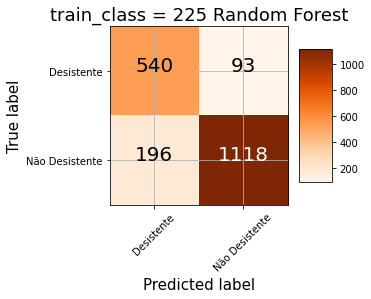

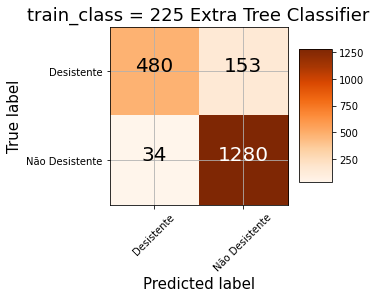

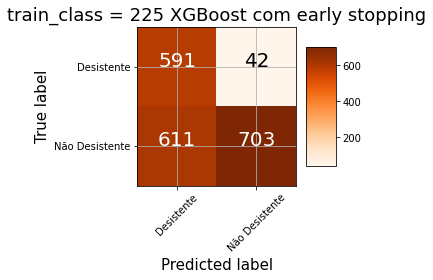

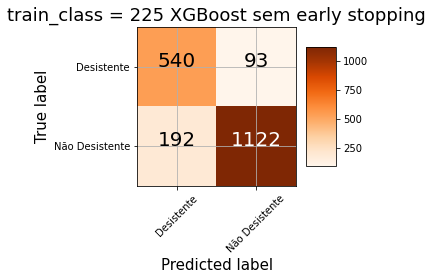

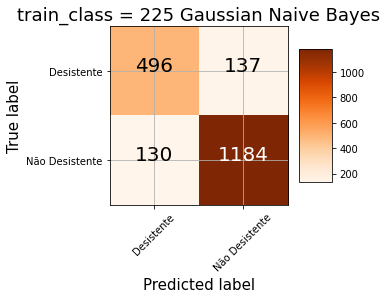

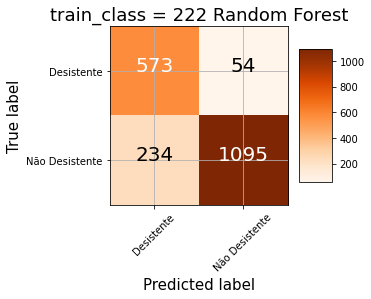

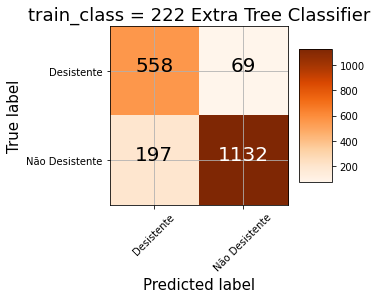

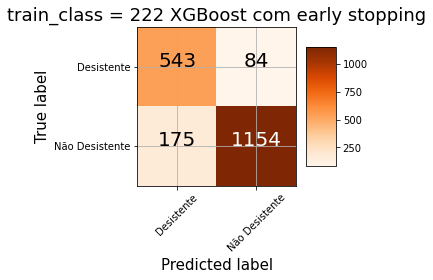

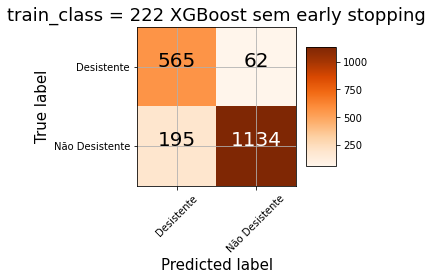

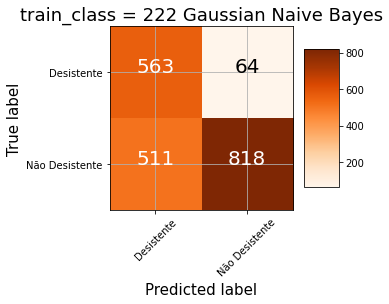

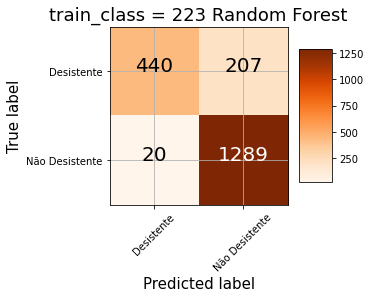

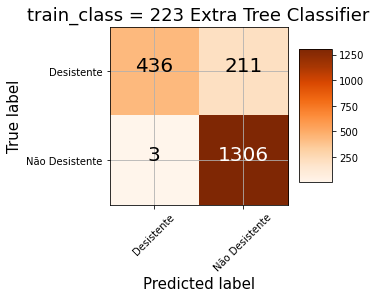

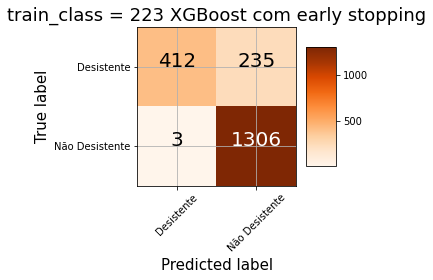

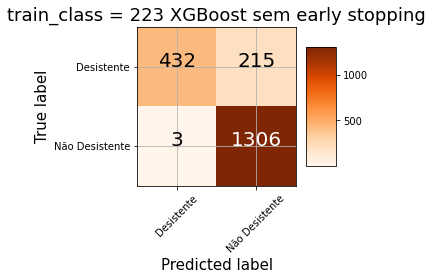

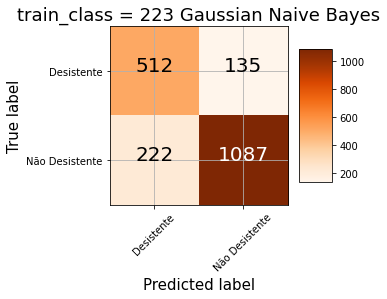

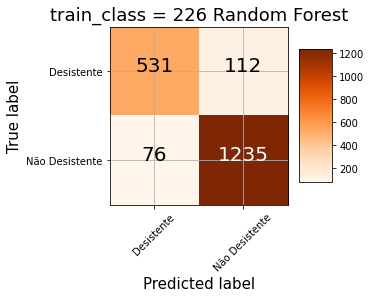

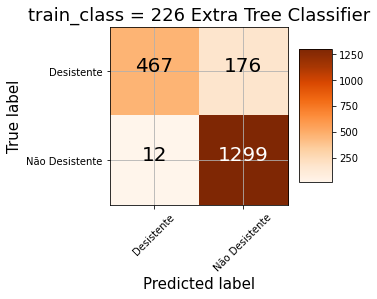

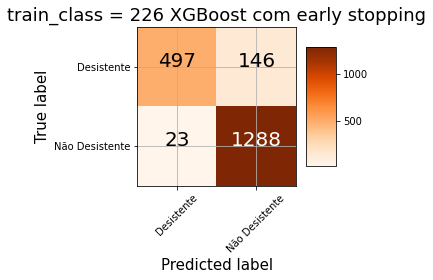

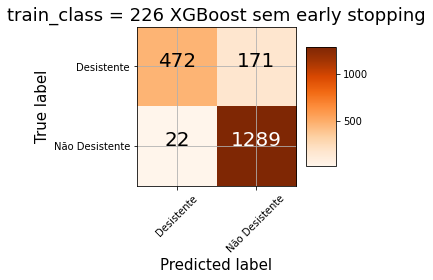

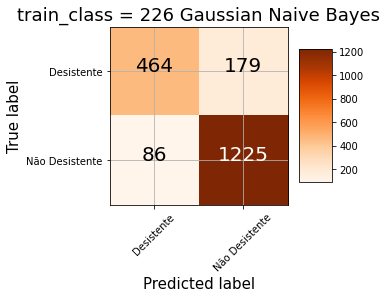

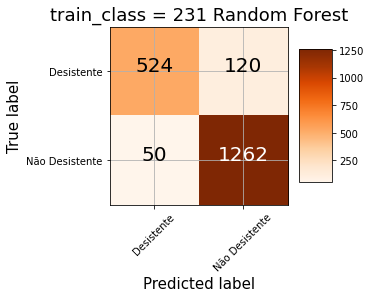

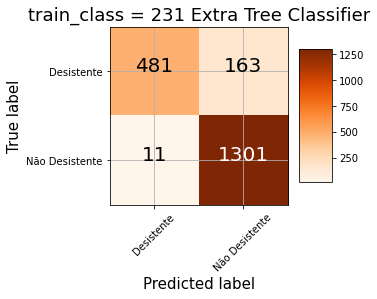

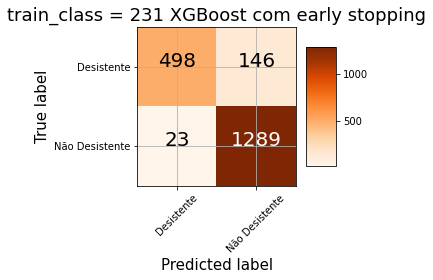

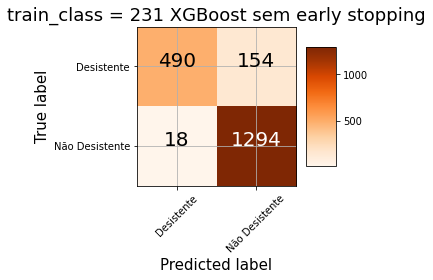

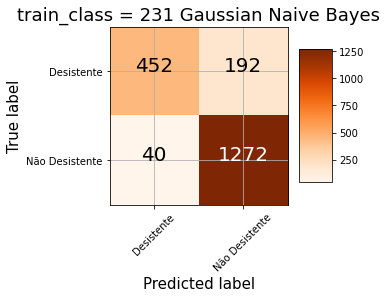

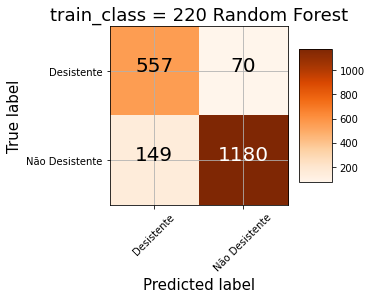

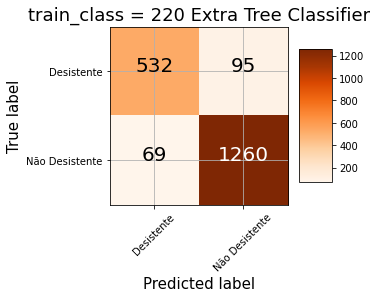

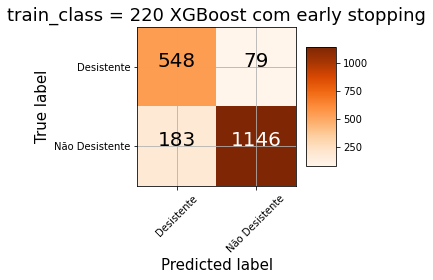

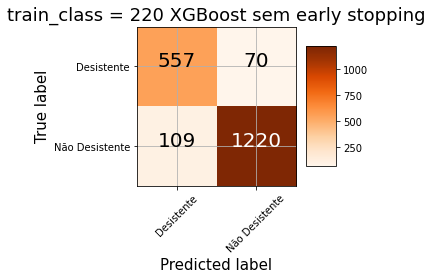

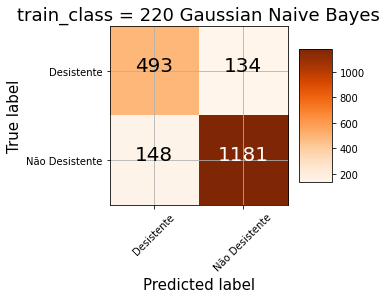

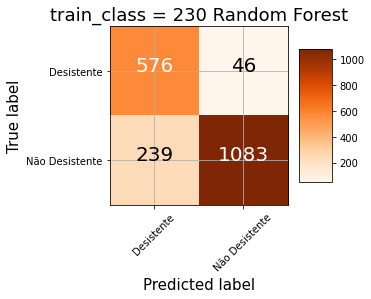

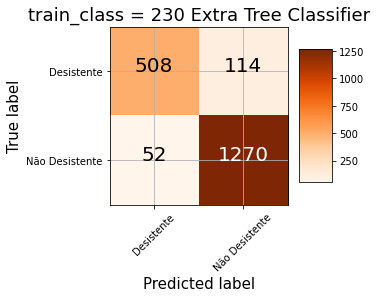

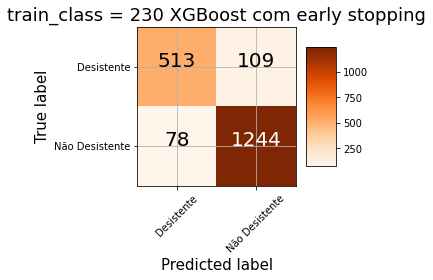

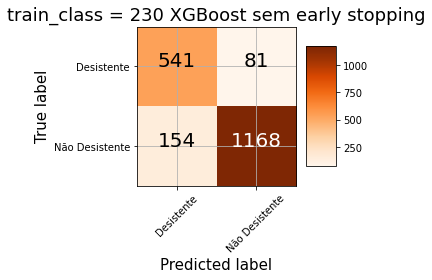

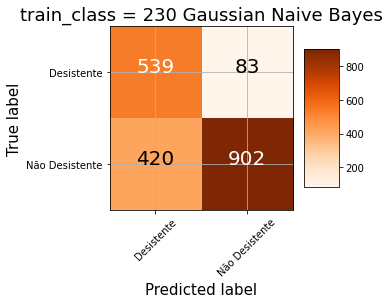

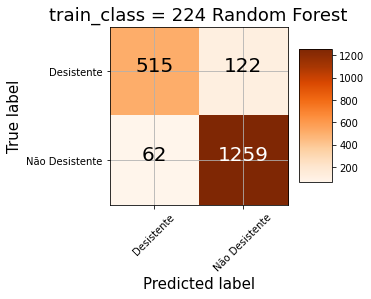

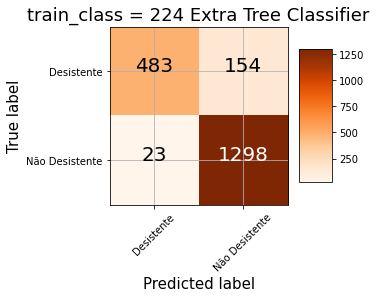

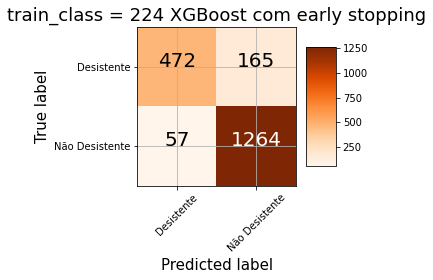

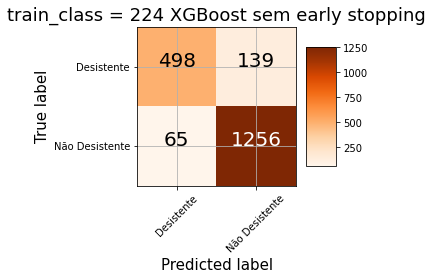

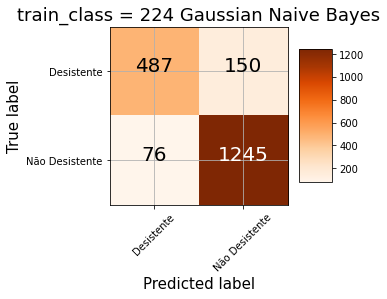

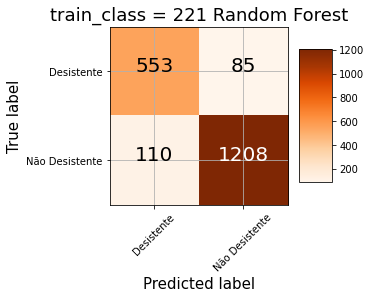

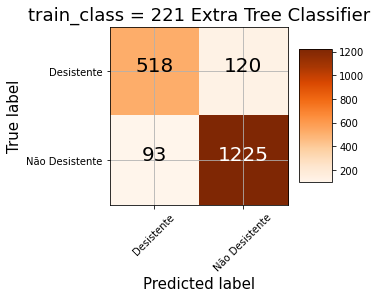

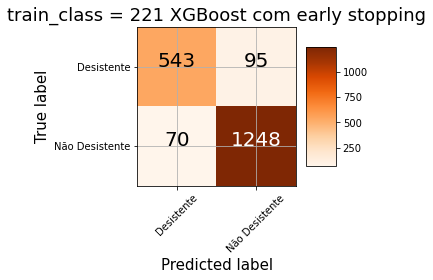

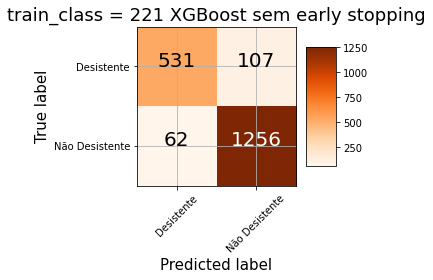

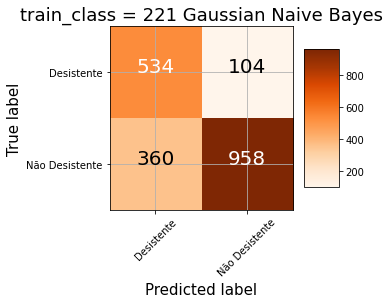

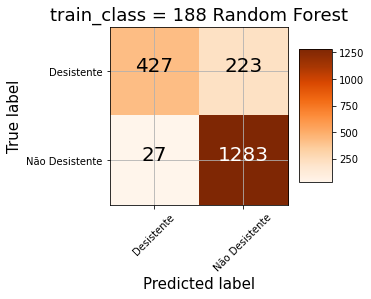

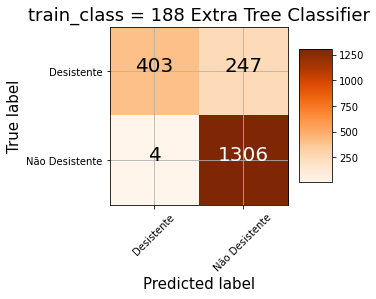

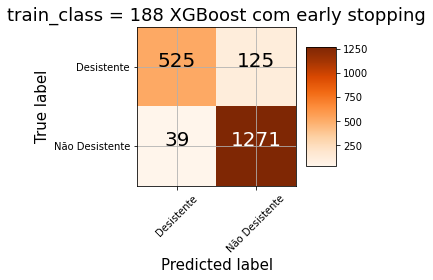

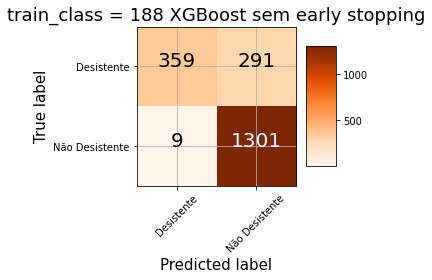

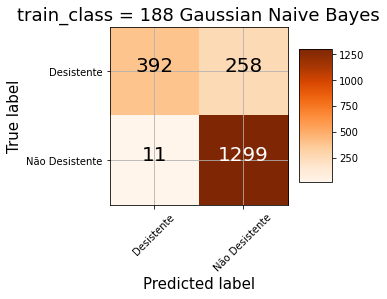

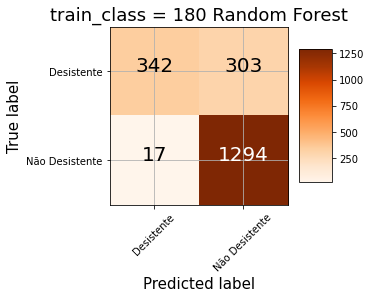

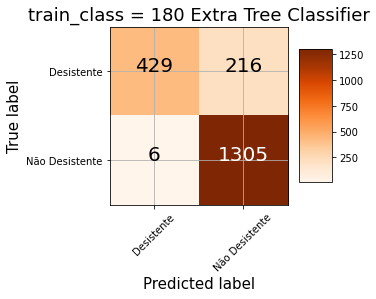

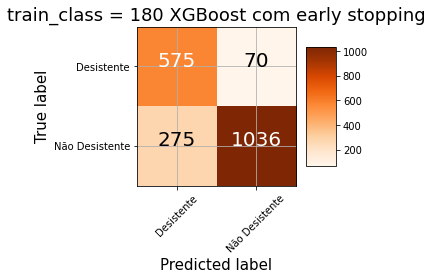

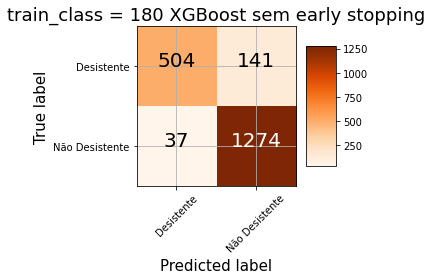

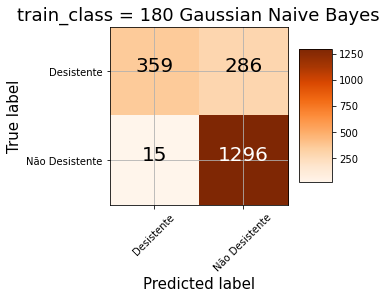

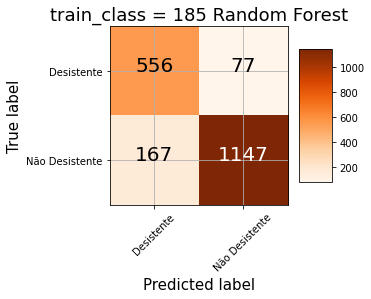

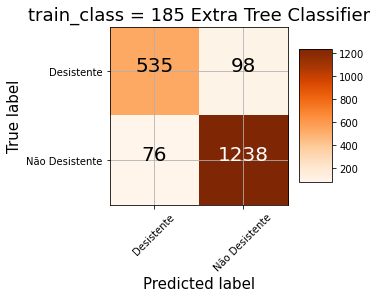

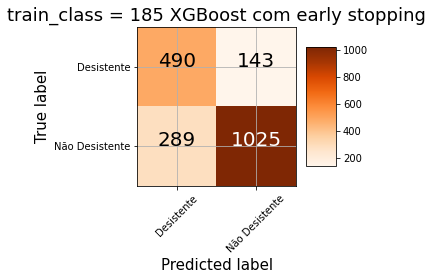

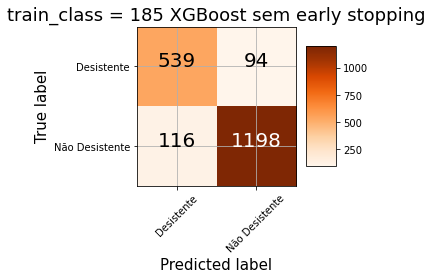

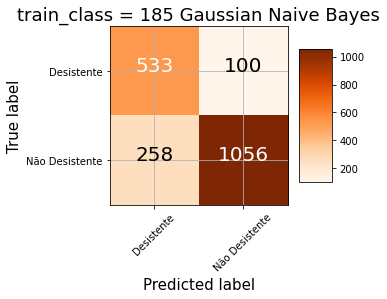

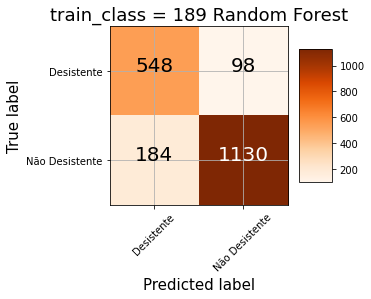

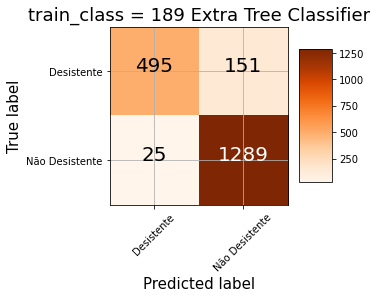

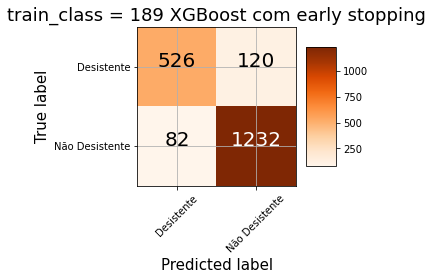

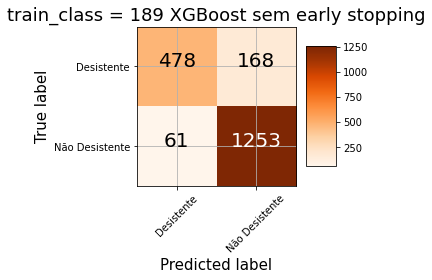

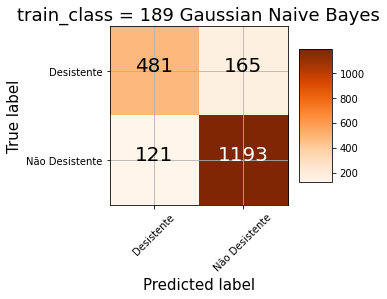

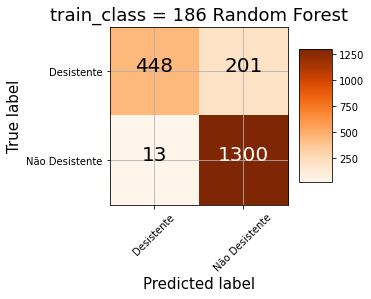

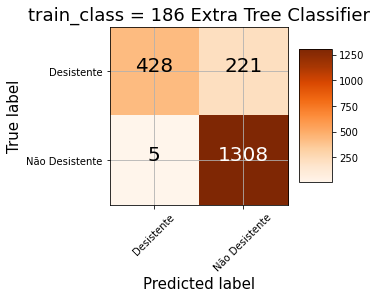

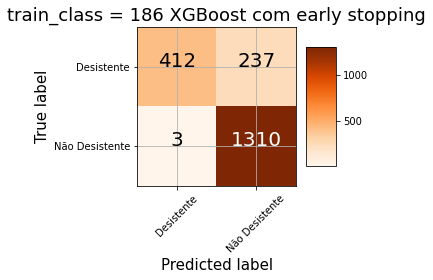

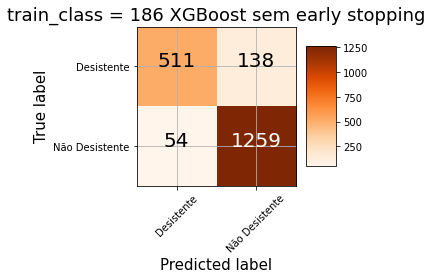

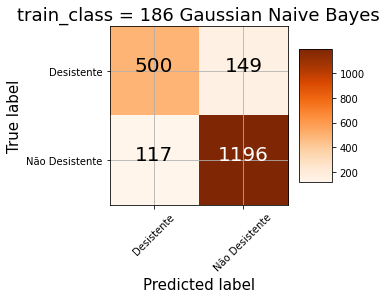

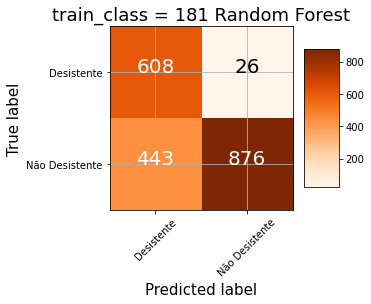

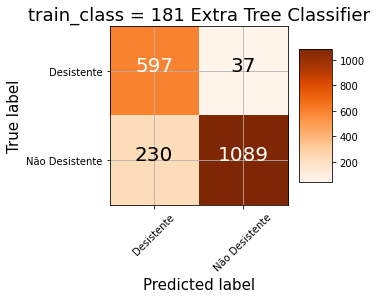

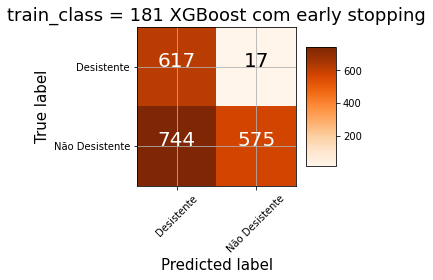

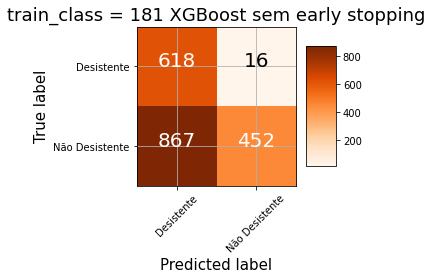

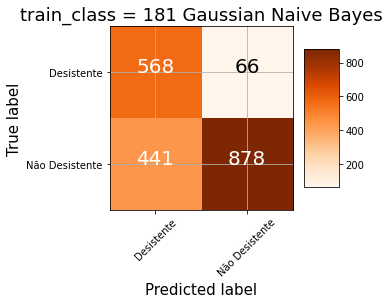

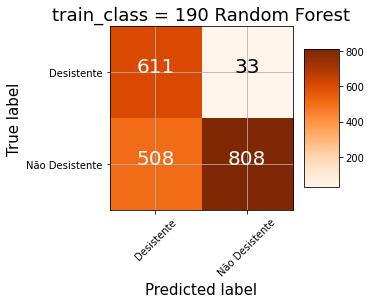

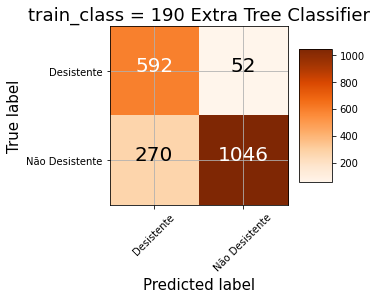

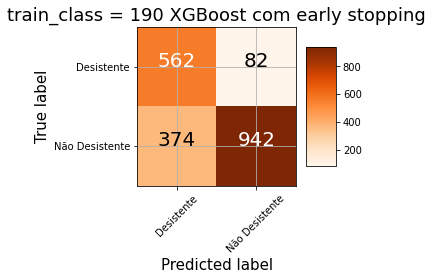

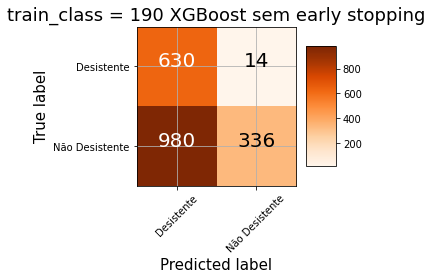

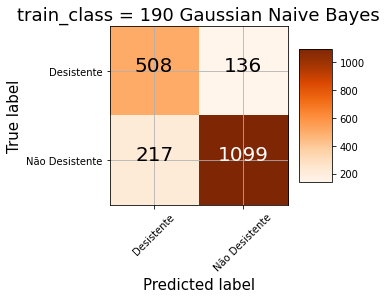

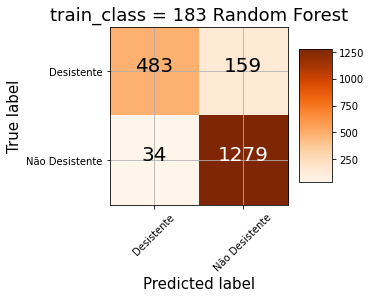

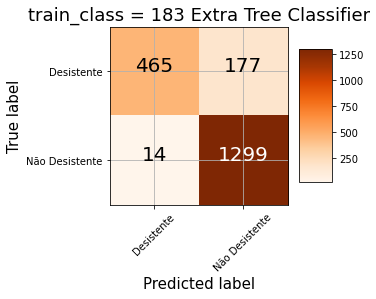

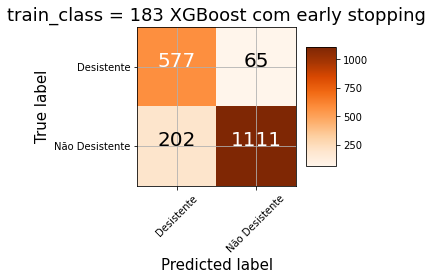

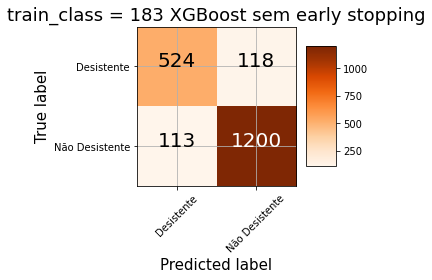

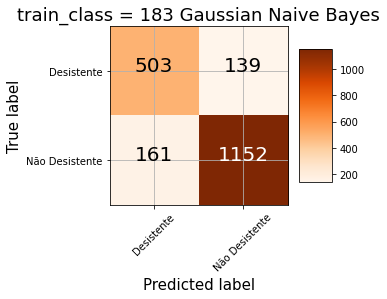

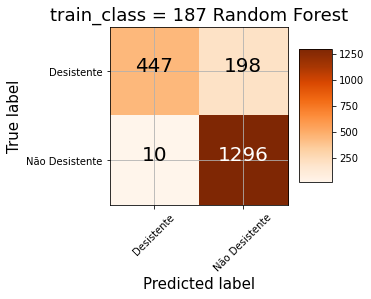

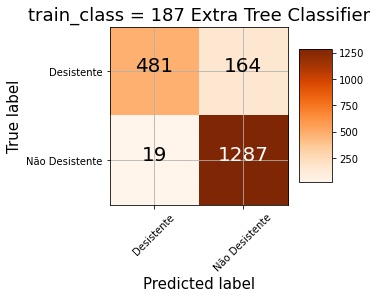

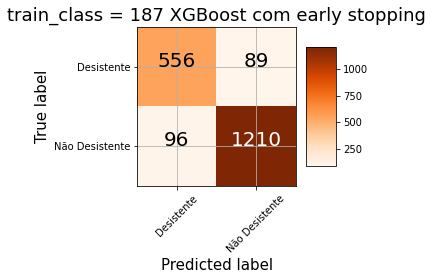

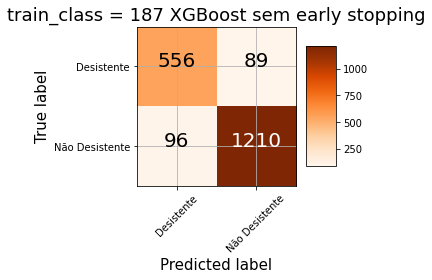

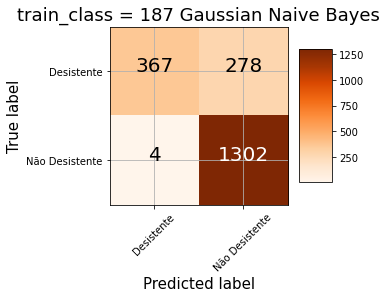

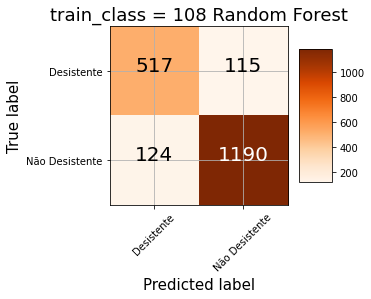

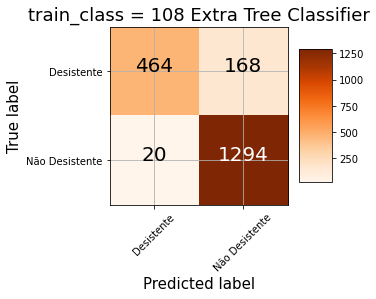

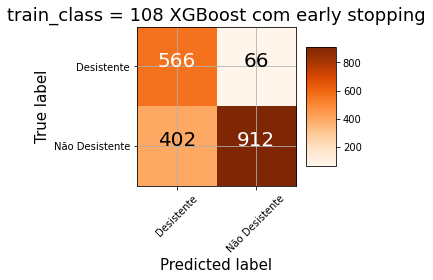

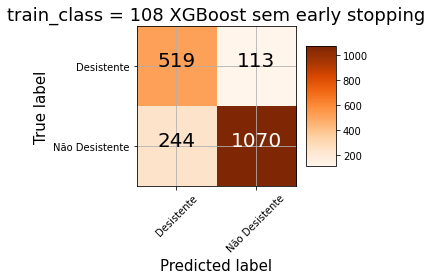

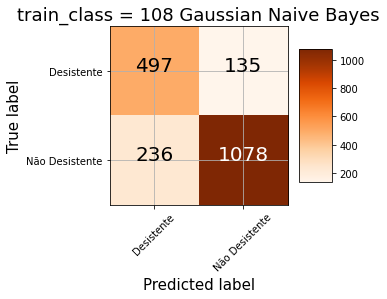

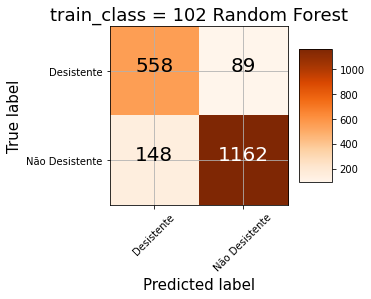

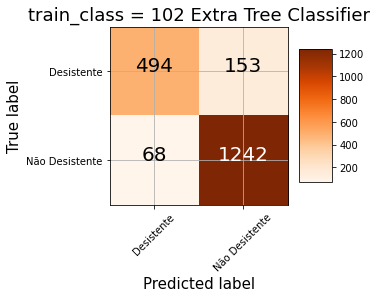

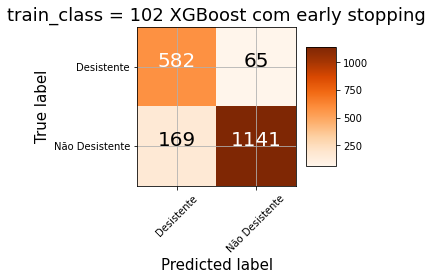

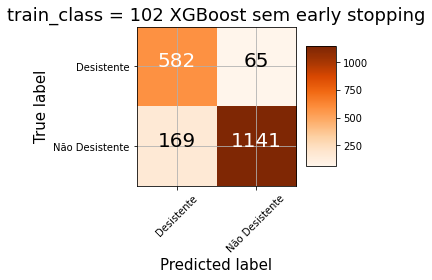

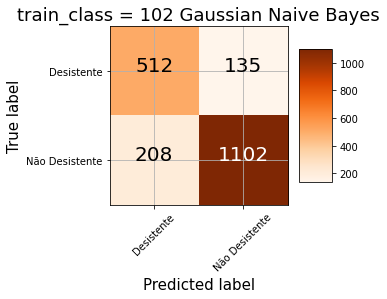

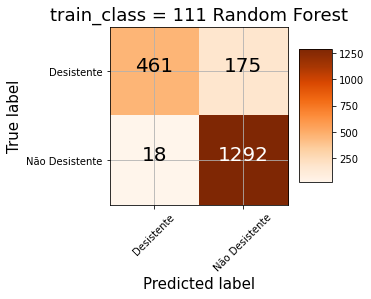

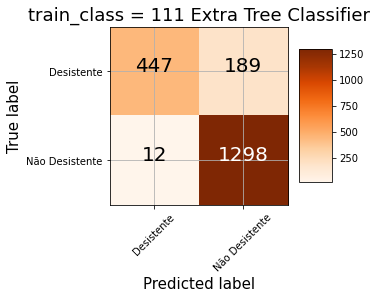

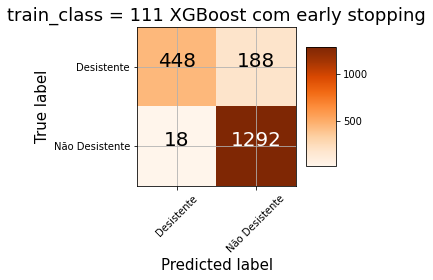

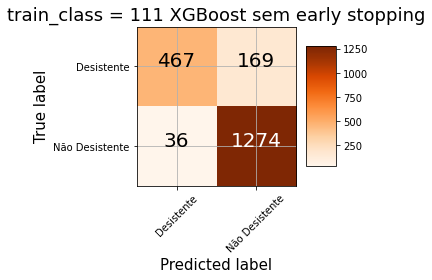

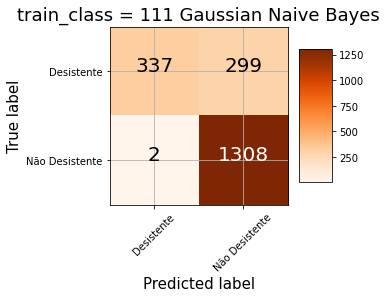

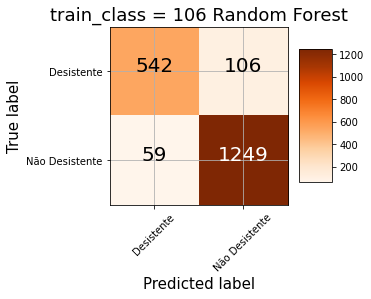

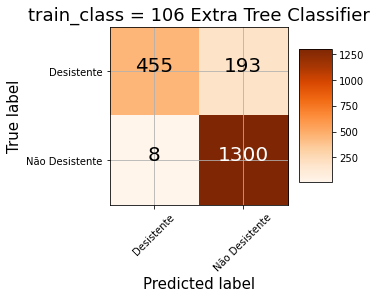

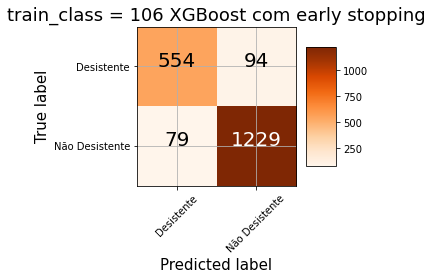

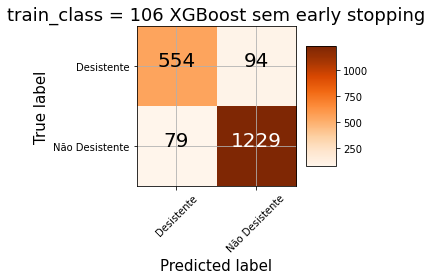

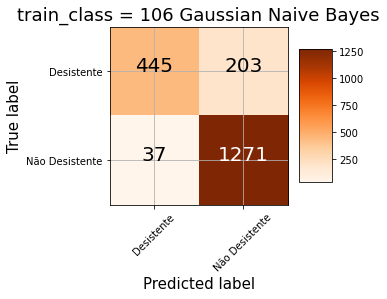

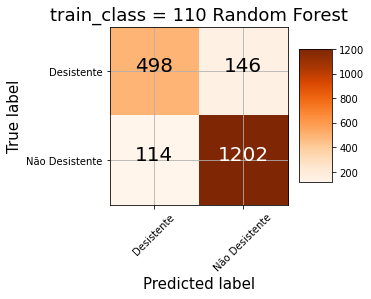

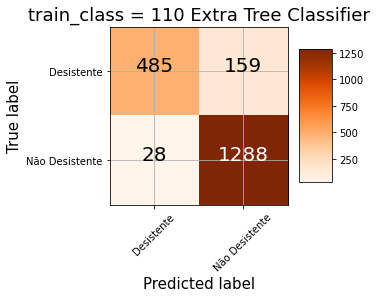

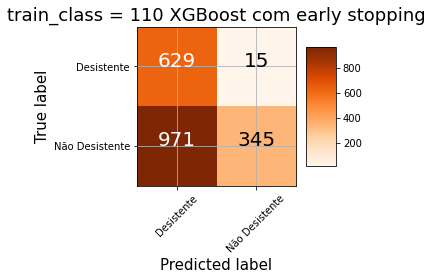

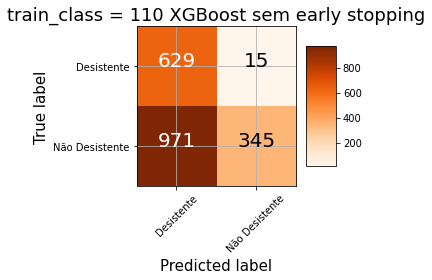

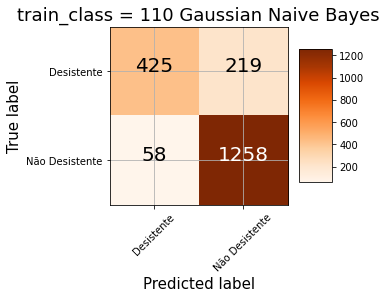

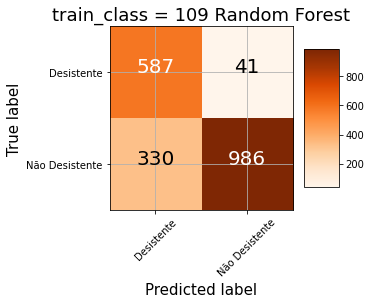

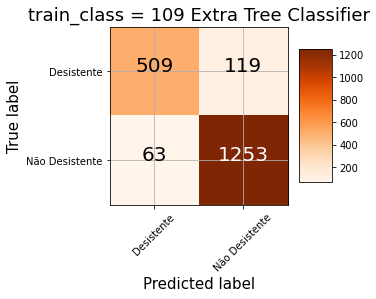

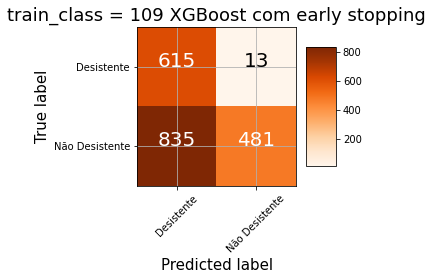

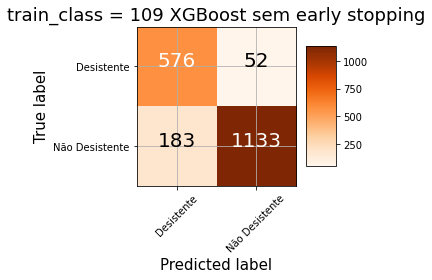

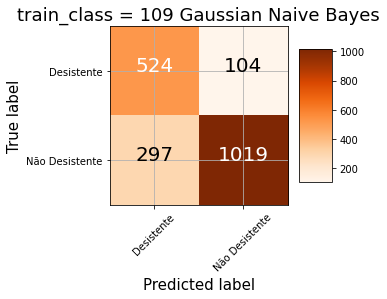

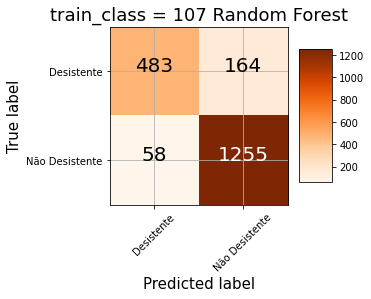

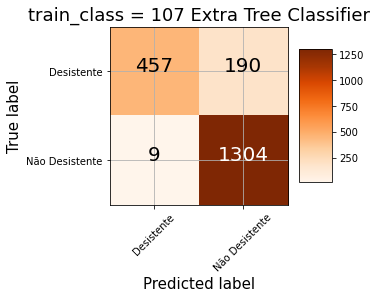

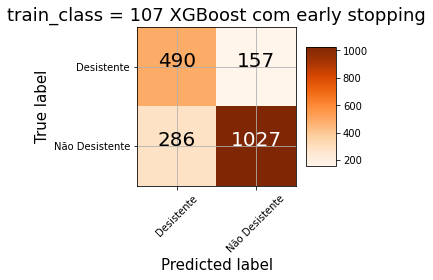

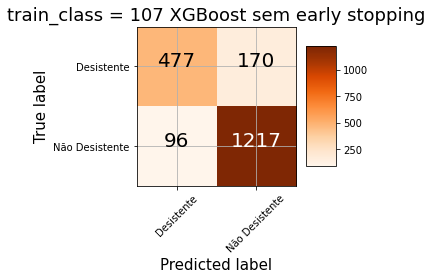

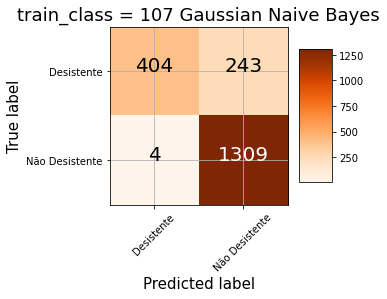

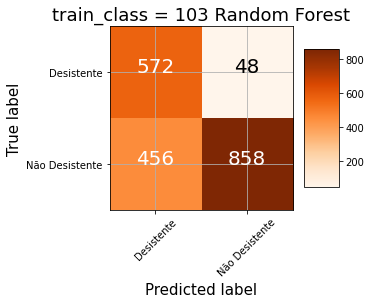

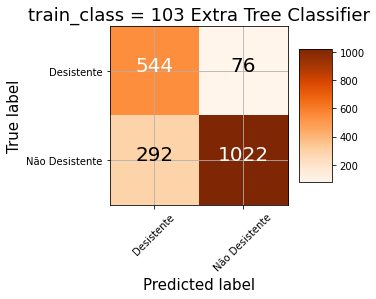

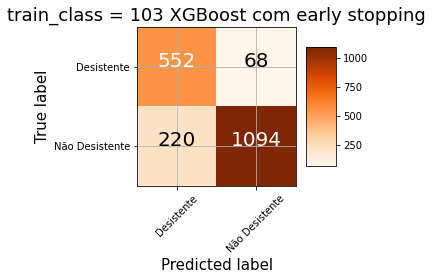

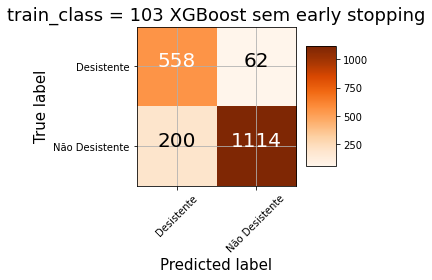

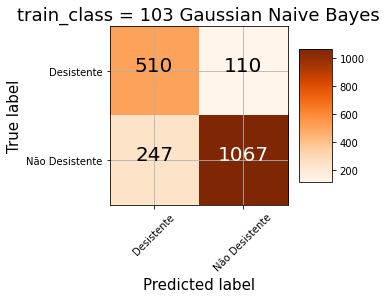

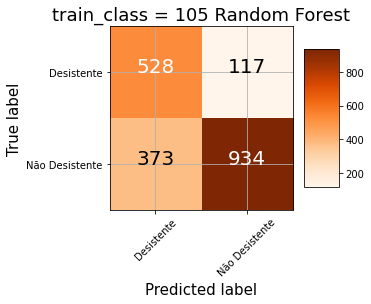

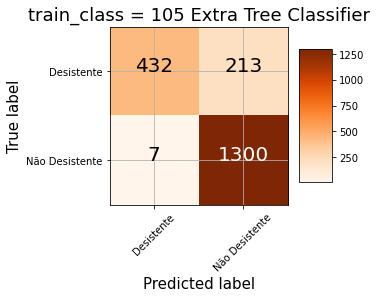

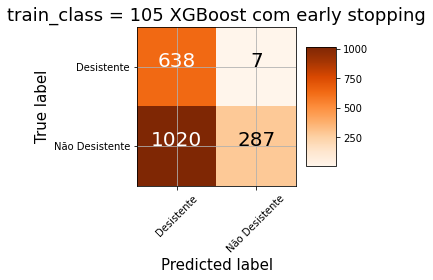

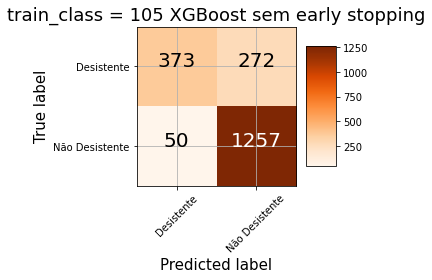

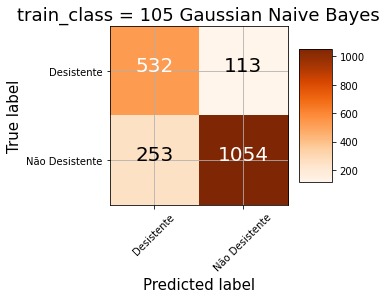

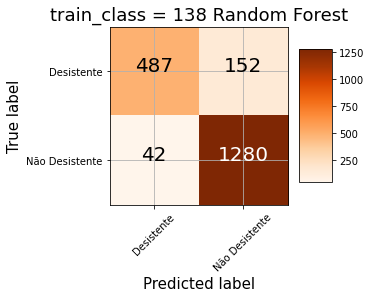

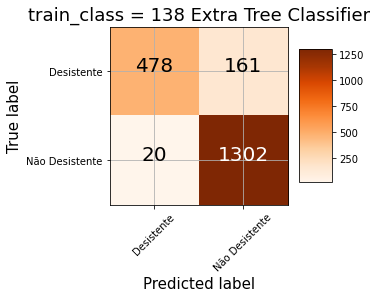

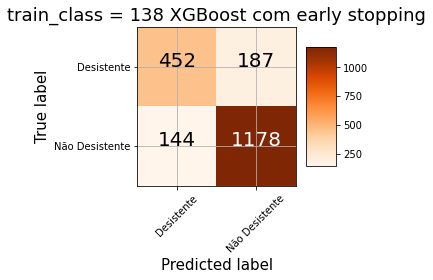

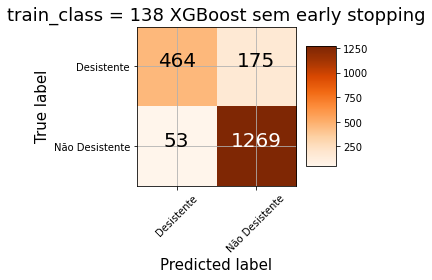

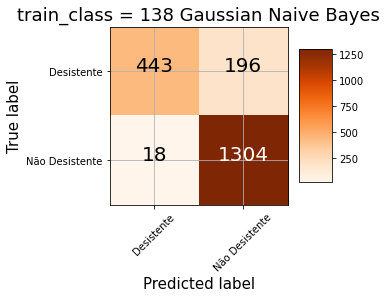

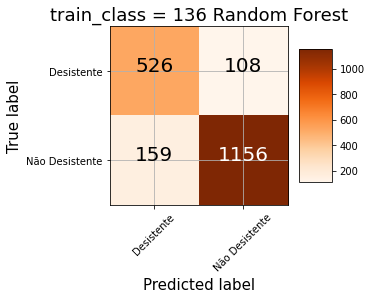

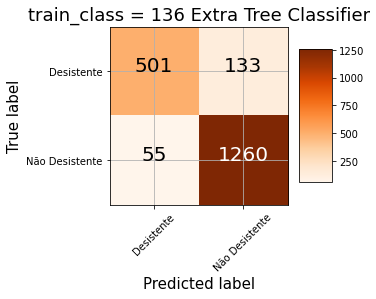

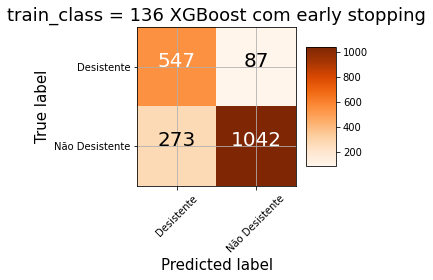

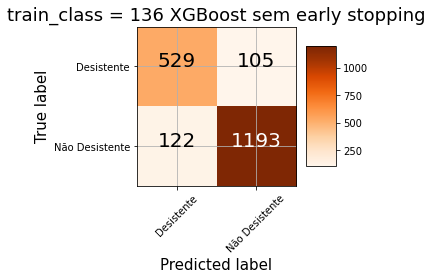

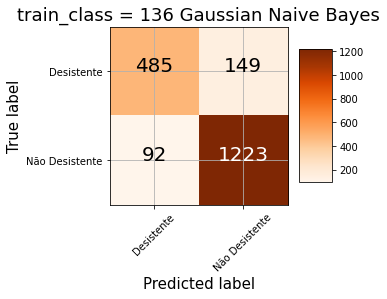

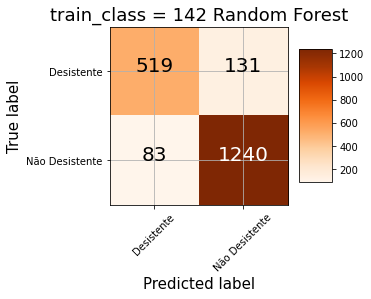

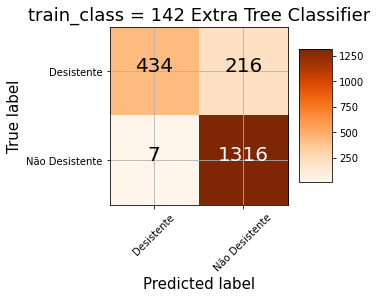

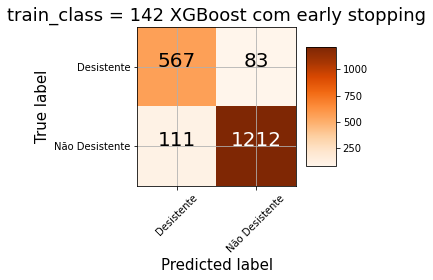

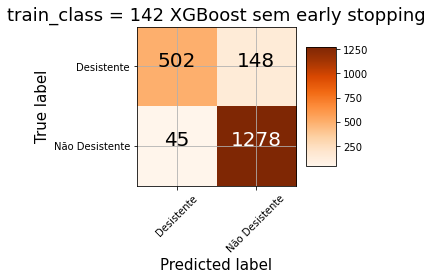

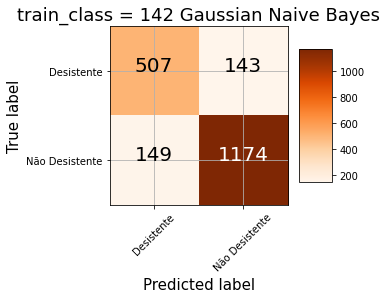

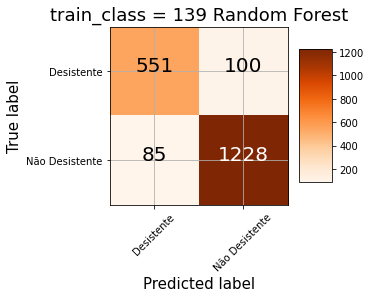

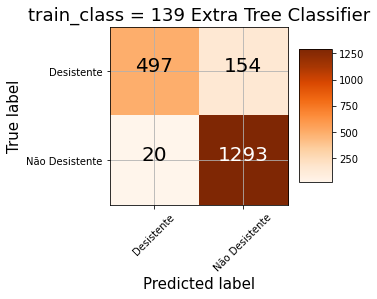

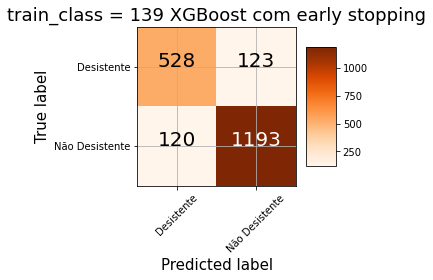

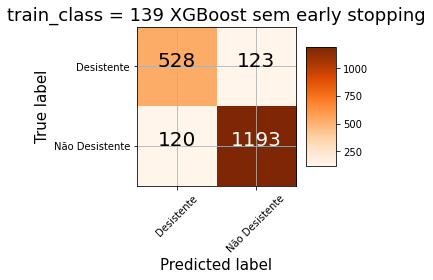

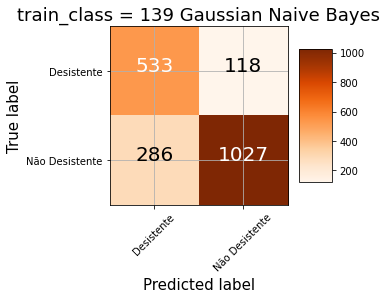

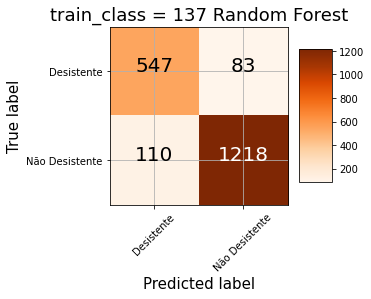

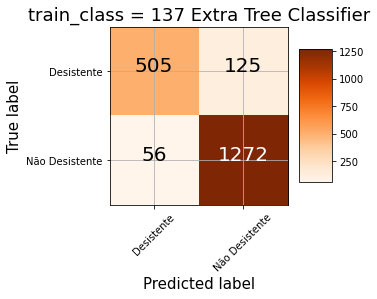

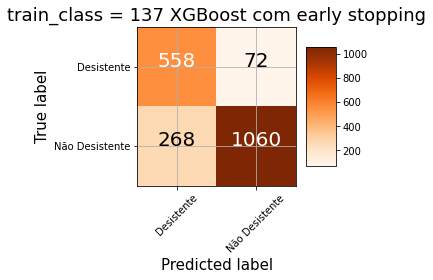

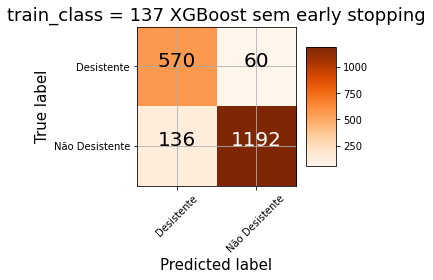

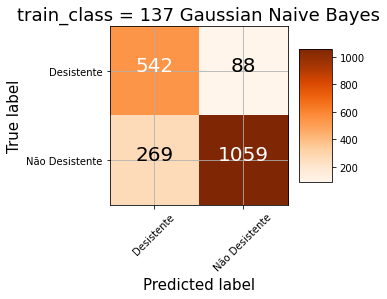

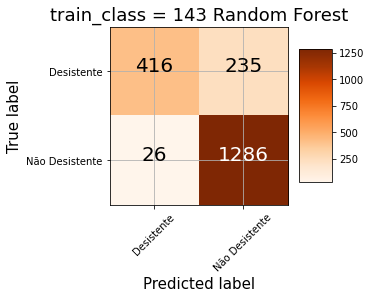

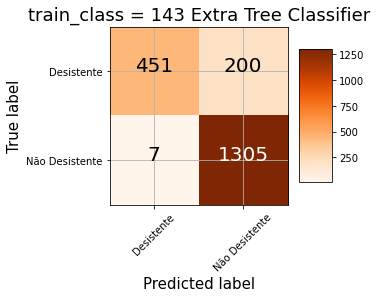

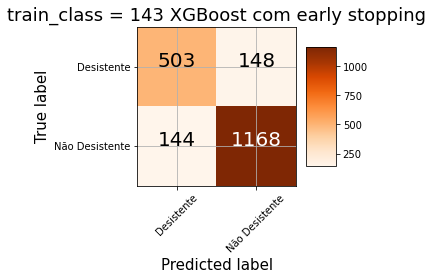

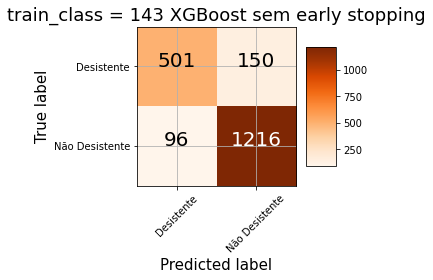

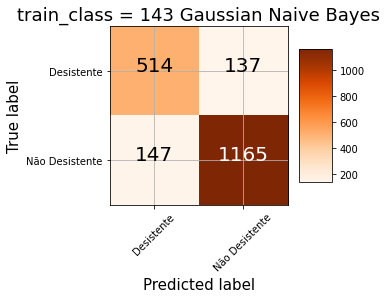

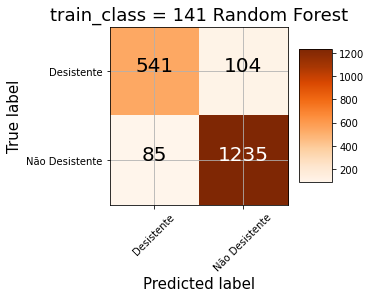

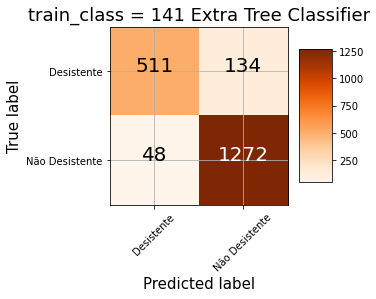

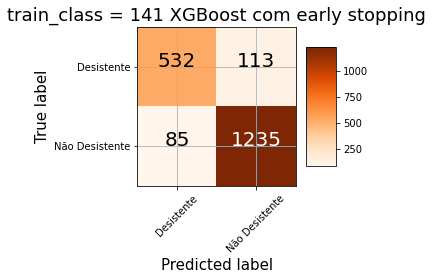

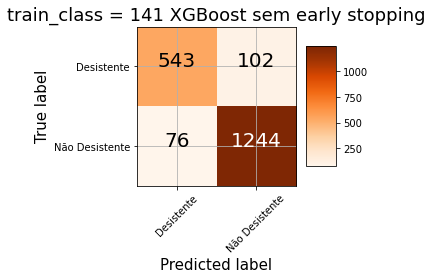

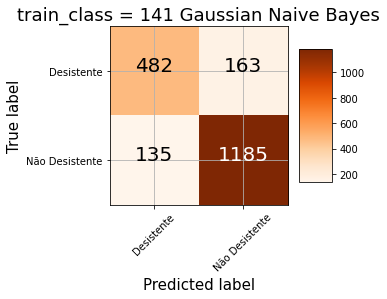

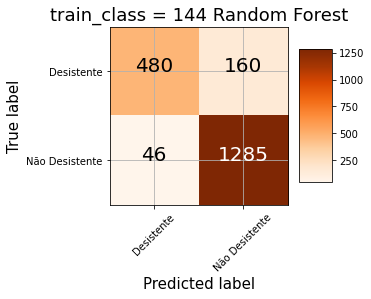

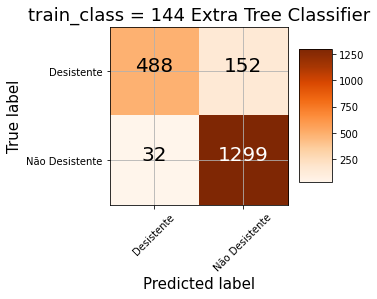

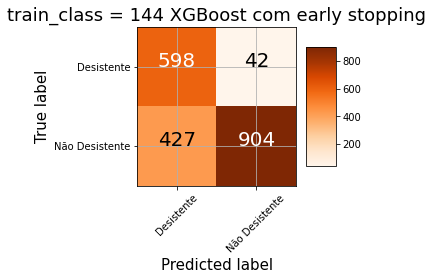

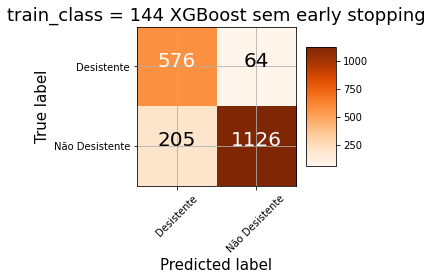

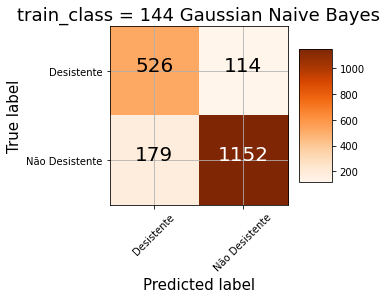

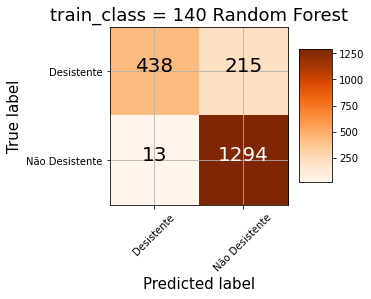

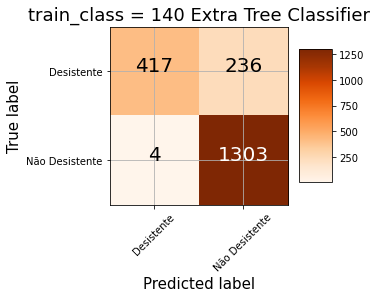

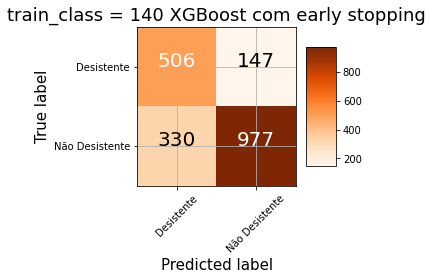

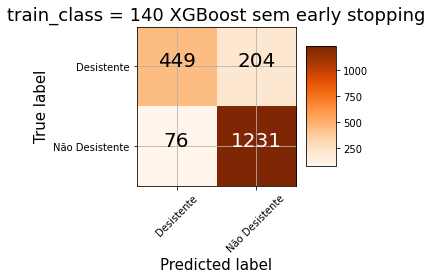

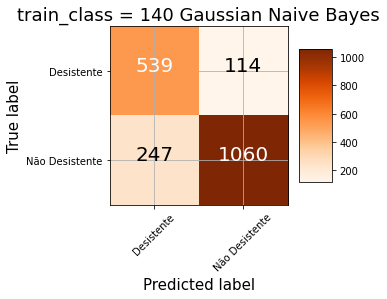

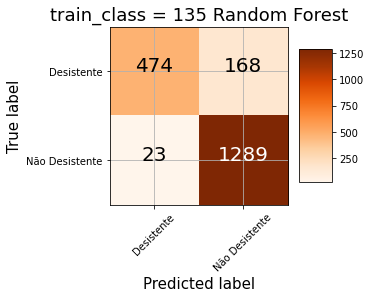

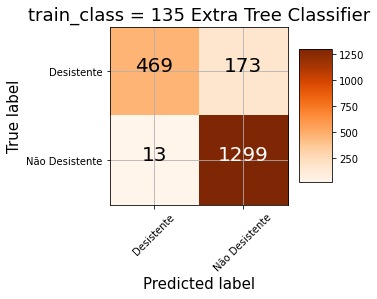

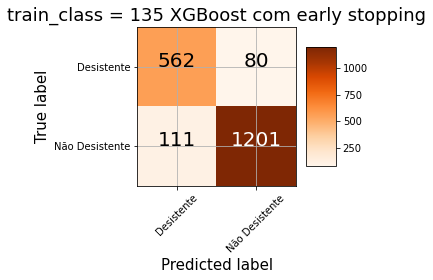

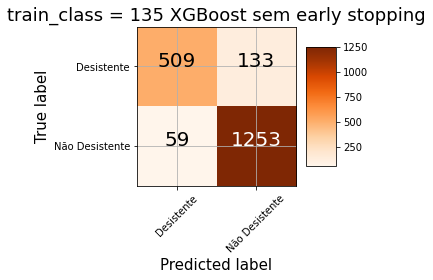

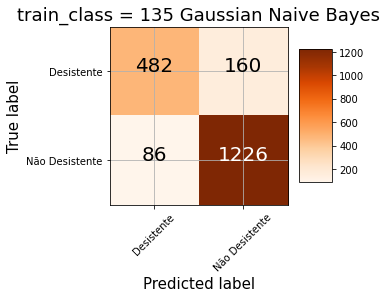

In [ ]:
#@title
def train_class_test_one_a_one_with_cv():
    c = ['train_class_id','random_forest','extra_tree_class','xgboost','xgboost_early_stopping','gaussian_naive_bayes']
    l = [c]
    for class_id in df_data_target.class_id.unique():
        df_data_class = df_data_target.loc[df_data_target['class_id'] == class_id]
        df_data_class = df_data_class.iloc[:, 3:]
        features = df_data_class.columns.difference(['target'])

        #print('Train class:', class_id)

        #data class do train
        x_train = df_data_class[features].values
        y_train = df_data_class['target'].values

        # model to learning
        p,a, rfc = train_test_random_forest(x_train, y_train)
        p,a, etc = train_test_extra_tree_classifier(x_train, y_train)
        p,a, xgb_we = train_test_xgb_early_stopping(x_train, y_train)
        p,a, xgb_ne = train_test_xgb(x_train, y_train)
        p,a, gnb = train_test_gaussian_naive_bayes(x_train, y_train)

        m = [[] for x in range(5)]
        y_preds = [[] for x in range(5)]
        y_tests = []

        for class_id_level_2 in df_data_target.class_id.unique():
            if class_id != class_id_level_2:
                df_data_class_2 = df_data_target.loc[df_data_target['class_id'] == class_id_level_2]
                df_data_class_2 = df_data_class_2.iloc[:, 3:]
                features = df_data_class_2.columns.difference(['target'])
                x_test = df_data_class_2[features].values
                y_test = df_data_class_2['target'].values

                y_tests.extend(y_test)

                y_pred = rfc.predict(x_test)
                y_preds[0].extend(y_pred)
                m[0].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = etc.predict(x_test)
                y_preds[1].extend(y_pred)
                m[1].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = xgb_we.predict(x_test)
                y_preds[2].extend(y_pred)
                m[2].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = xgb_ne.predict(x_test)
                y_preds[3].extend(y_pred)
                m[3].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                y_pred = gnb.predict(x_test)
                y_preds[4].extend(y_pred)
                m[4].append(accuracy_score(y_true=y_test, y_pred=y_pred))
                #print([class_id] + [class_id_level_2] + [np.mean(n) for n in m])

        l.append([class_id] + [np.mean(n) for n in m])
        
        m = metrics.confusion_matrix(y_tests, y_preds[0])
        t = 'train_class = ' + str(class_id) + ' Random Forest'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[1])
        t = 'train_class = ' + str(class_id) + ' Extra Tree Classifier'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[2])
        t = 'train_class = ' + str(class_id) + ' XGBoost com early stopping'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[3])
        t = 'train_class = ' + str(class_id) + ' XGBoost sem early stopping'
        plot_confusion_matrix(cm=m, title=t)

        m = metrics.confusion_matrix(y_tests, y_preds[4])
        t = 'train_class = ' + str(class_id) + ' Gaussian Naive Bayes'
        plot_confusion_matrix(cm=m, title=t)

        
    return pd.DataFrame(l[1:], columns=l[0])
        #print('        RFC Acurácia média de teste com outras turmas:', np.mean(m[0]))
        #print('        ETC Acurácia média de teste com outras turmas:', np.mean(m[1]))
        #print('        XGB early Acurácia média de teste com outras turmas:', np.mean(m[2]))
        #print('        XGB Acurácia média de teste com outras turmas:', np.mean(m[3]))
        #print('        GNB Acurácia média de teste com outras turmas:', np.mean(m[4]))
df_train_class_test_mean_withcv = train_class_test_one_a_one_with_cv()

## Exportando o resultado para um excel

In [ ]:
from pandas import ExcelWriter
 
writer = ExcelWriter('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataset_experimento/resultado_provas/result_prova_2.xlsx')

df_accur_all_classes.to_excel(writer, sheet_name='train_test_turmas_individuais', index=False)
df_train_class_one_a_one_nocv.to_excel(writer, sheet_name='train_1_turma_test_com_todas_semcv', index=False)
df_train_class_one_a_one_withcv.to_excel(writer, sheet_name='train_1_turma_test_com_todas_comcv', index=False)
df_train_class_test_mean_nocv.to_excel(writer, sheet_name='train_1_turma_mean_tests_semcv', index=False)
df_train_class_test_mean_withcv.to_excel(writer, sheet_name='train_1_turma_mean_tests_comcv', index=False)

writer.save()